In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans 
from sklearn.neighbors import NearestNeighbors
from scipy.stats import zscore 
from sklearn.metrics import silhouette_score 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')

## DATA PREPROCESSING

In [3]:
df1 =pd.read_csv('Batters.csv')
df1.head()

,Player,I,R,B,Outs,Avg,SR,HS,4s,6s,50,100
0,JM Bairstow,9,215,243,9,23.89,88.48,59,27,3,2,0
1,DJ Malan,9,404,400,9,44.89,101.00,140,50,9,2,1
2,JE Root,9,276,312,9,30.67,88.46,82,21,2,3,0
3,HC Brook,6,169,150,6,28.17,112.67,66,20,5,1,0
4,MM Ali,6,95,127,6,15.83,74.80,42,8,1,0,0


In [4]:
df2 =pd.read_csv('Bowling.csv')
df2.head()

,Player,I,O,R,W,Econ,Avg,SR,4W,5W,BBI,4s,6s,Dots
0,A Dutt,9,77.3,426,10,5.50,42.60,46.50,0,0,3/44,46,10,266
1,A Zampa,11,96.0,515,23,5.36,22.39,25.04,3,0,4/8,33,14,261
2,AAP Atkinson,3,24.0,146,4,6.08,36.50,36.00,0,0,2/45,13,7,81
3,AD Mathews,5,22.1,107,6,4.83,17.83,22.17,0,0,2/14,11,0,69
4,Agha Salman,2,5.0,46,0,9.20,0.00,0.00,0,0,0/21,5,2,10


In [5]:
print("Batting Data Info:")
df1.info()
print("\nDuplicated rows in Batting Data:", df1[df1.duplicated()].shape[0])

Batting Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  146 non-null    object 
 1   I       146 non-null    int64  
 2   R       146 non-null    int64  
 3   B       146 non-null    int64  
 4   Outs    146 non-null    int64  
 5   Avg     146 non-null    float64
 6   SR      146 non-null    float64
 7   HS      146 non-null    int64  
 8   4s      146 non-null    int64  
 9   6s      146 non-null    int64  
 10  50      146 non-null    int64  
 11  100     146 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 13.8+ KB

Duplicated rows in Batting Data: 0


In [6]:
print("Bowling Data Info:")
df2.info()
print("\nDuplicated rows in Bowling Data:", df2[df2.duplicated()].shape[0])

Bowling Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  102 non-null    object 
 1   I       102 non-null    int64  
 2   O       102 non-null    float64
 3   R       102 non-null    int64  
 4   W       102 non-null    int64  
 5   Econ    102 non-null    float64
 6   Avg     102 non-null    float64
 7   SR      102 non-null    float64
 8   4W      102 non-null    int64  
 9   5W      102 non-null    int64  
 10  BBI     102 non-null    object 
 11  4s      102 non-null    int64  
 12  6s      102 non-null    int64  
 13  Dots    102 non-null    int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 11.3+ KB

Duplicated rows in Bowling Data: 0


In [7]:
df1.shape
print(f"The batting dataset has {df1.shape[0]} rows, and {df1.shape[1]} columns.")

The batting dataset has 146 rows, and 12 columns.


In [8]:
df2.shape
print(f"The bowling dataset has {df2.shape[0]} rows, and {df2.shape[1]} columns.")

The bowling dataset has 102 rows, and 14 columns.


In [9]:
df1.isna().sum()

Player    0
I         0
R         0
B         0
Outs      0
Avg       0
SR        0
HS        0
4s        0
6s        0
50        0
100       0
dtype: int64

In [10]:
df1=df1.dropna(axis=0)

In [11]:
df2.isna().sum()

Player    0
I         0
O         0
R         0
W         0
Econ      0
Avg       0
SR        0
4W        0
5W        0
BBI       0
4s        0
6s        0
Dots      0
dtype: int64

In [12]:
df2=df2.dropna(axis=0)

In [13]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
I,146.0,5.965753,2.990593,1.0,3.0000,6.00,9.0000,11.00
R,146.0,160.452055,160.353836,0.0,29.2500,99.00,279.0000,765.00
B,146.0,174.342466,162.280576,2.0,42.0000,115.00,272.0000,847.00
Outs,146.0,4.979452,2.944239,0.0,2.0000,5.00,8.0000,11.00
Avg,146.0,26.245137,19.791534,0.0,11.8150,22.04,40.0000,95.62
SR,146.0,85.574658,28.193571,0.0,70.8825,84.87,101.6775,177.78
HS,146.0,54.561644,44.254900,0.0,16.2500,42.50,77.7500,201.00
4s,146.0,15.349315,15.880846,0.0,3.0000,8.00,25.0000,68.00
6s,146.0,4.410959,6.093152,0.0,0.0000,2.00,5.0000,31.00
50,146.0,0.815068,1.144724,0.0,0.0000,0.00,1.0000,6.00


In [14]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
I,102.0,5.627451,3.317883,1.0,2.2500,6.000,9.0000,11.0
O,102.0,41.405882,30.035823,0.5,13.2500,38.000,66.6000,96.0
R,102.0,238.156863,161.276820,5.0,87.2500,233.500,379.7500,533.0
W,102.0,6.754902,6.214700,0.0,2.0000,5.000,10.0000,24.0
Econ,102.0,6.260686,1.511496,3.4,5.4275,5.960,6.7425,12.0
Avg,102.0,34.780000,25.920577,0.0,22.4425,33.155,44.0000,118.5
SR,102.0,35.191863,25.646774,0.0,22.0425,33.810,46.4050,114.0
4W,102.0,0.176471,0.454063,0.0,0.0000,0.000,0.0000,3.0
5W,102.0,0.068627,0.352075,0.0,0.0000,0.000,0.0000,3.0
4s,102.0,21.970588,16.761847,0.0,7.0000,19.500,33.7500,64.0


## BATTING DATA

Text(0.5, 1.0, 'Top 10 Players by Runs')

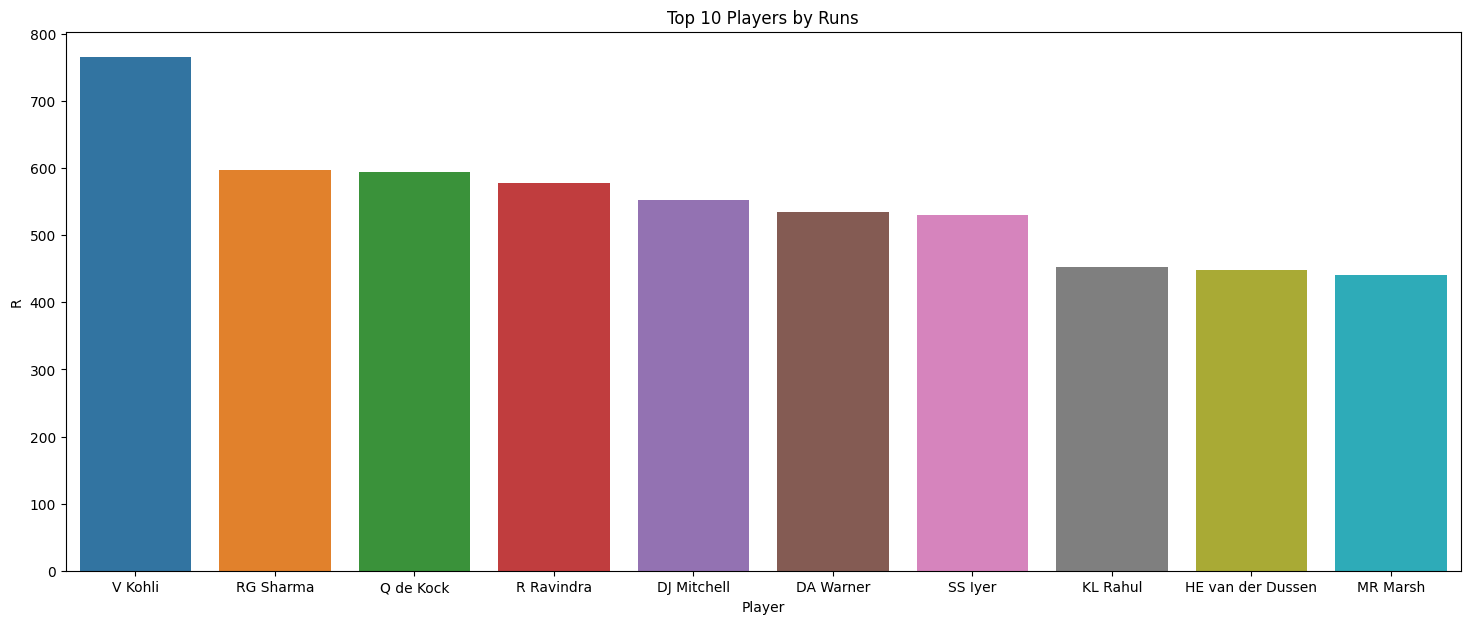

In [15]:
plt.figure(figsize=(18,7))
b1=df1.groupby('Player')['R'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Player' ,'R']
sns.barplot(data= b1 , x= 'Player' , y ='R')
plt.title("Top 10 Players by Runs")

Text(0.5, 1.0, 'Top 10 players by Strike Rate')

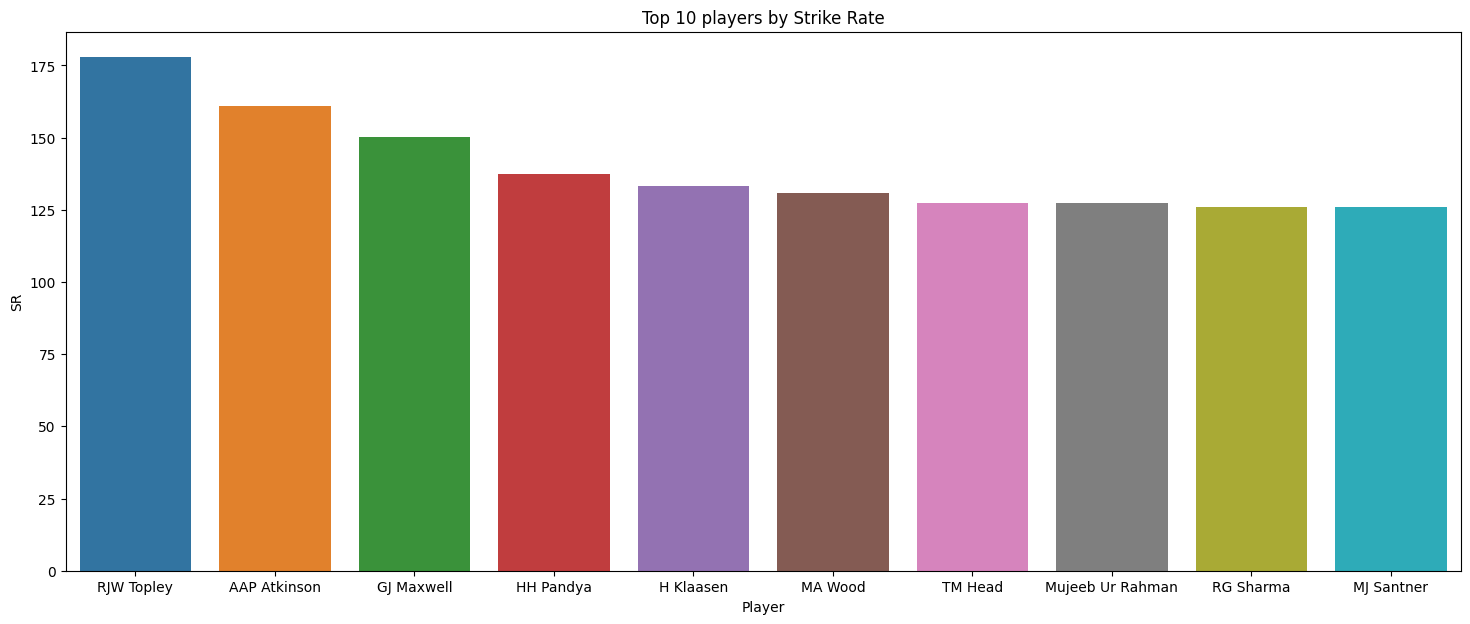

In [16]:
plt.figure(figsize=(18,7))
b1=df1.groupby('Player')['SR'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Player' ,'SR']
sns.barplot(data= b1 , x= 'Player' , y ='SR')
plt.title("Top 10 players by Strike Rate")

Text(0.5, 1.0, 'Top 10 players by Fours')

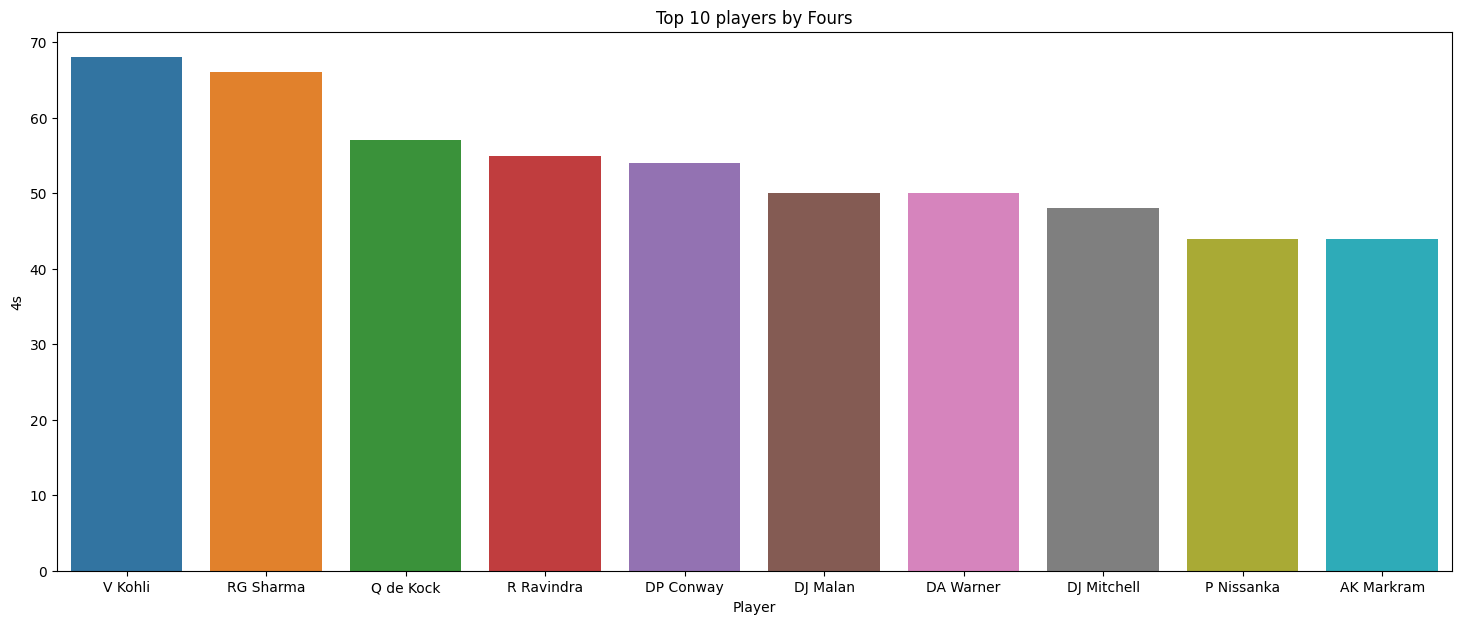

In [17]:
plt.figure(figsize=(18,7))
b1=df1.groupby('Player')['4s'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Player' ,'4s']
sns.barplot(data= b1 , x= 'Player' , y ='4s')
plt.title("Top 10 players by Fours")

Text(0.5, 1.0, 'Top 10 players by Sixes')

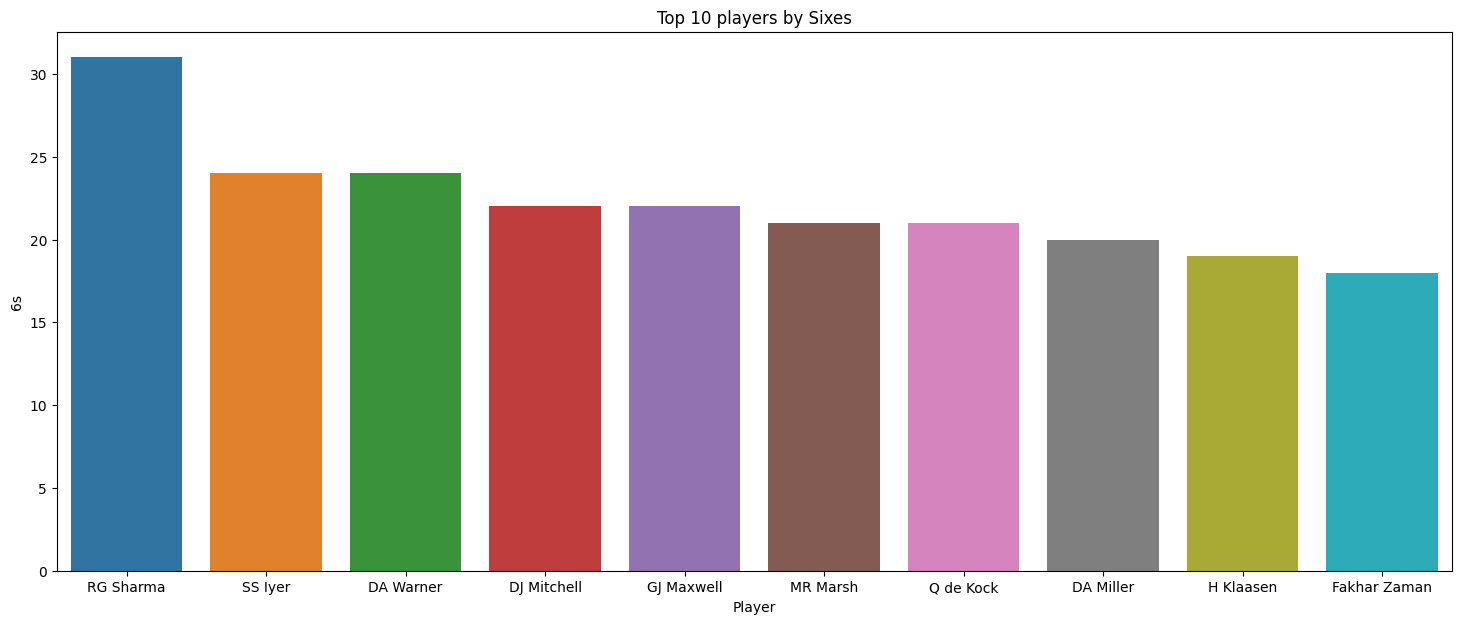

In [18]:
plt.figure(figsize=(18,7))
b1=df1.groupby('Player')['6s'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Player' ,'6s']
sns.barplot(data= b1 , x= 'Player' , y ='6s')
plt.title("Top 10 players by Sixes")

Text(0.5, 1.0, 'Top 10 Players by Highest Score')

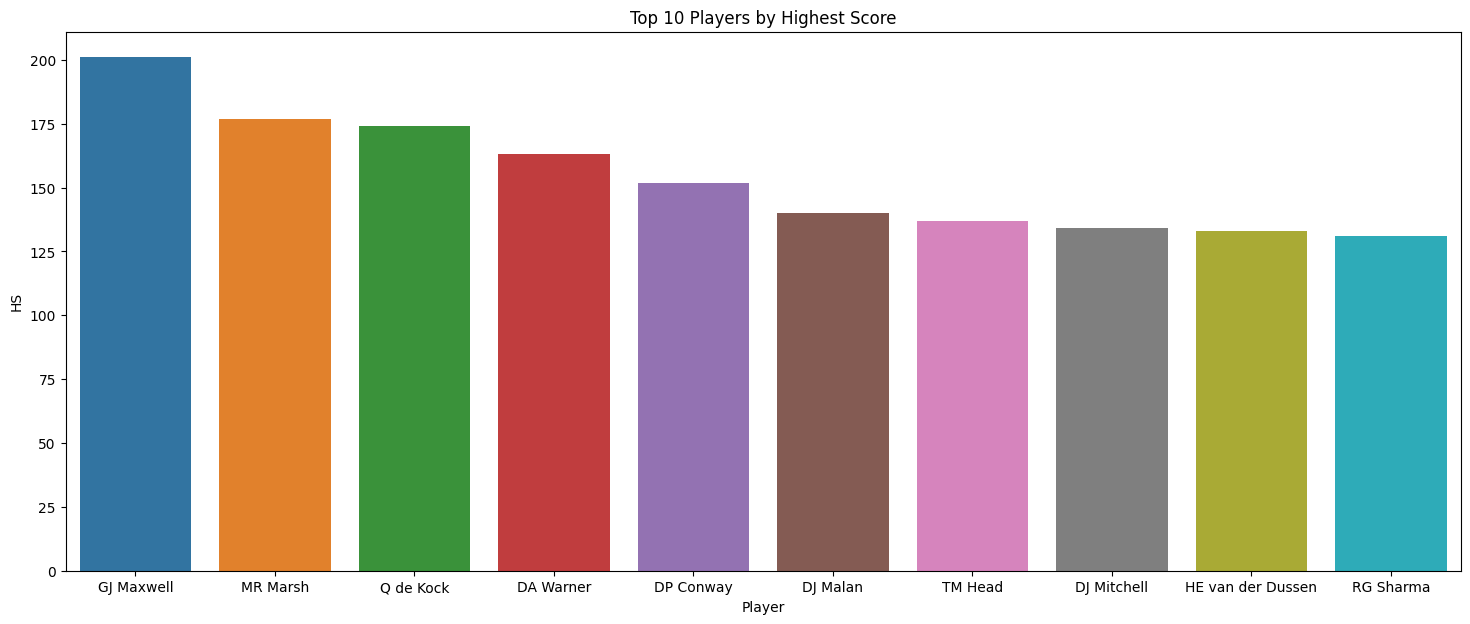

In [19]:
plt.figure(figsize=(18,7))
b1=df1.groupby('Player')['HS'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Player' ,'HS']
sns.barplot(data= b1 , x= 'Player' , y ='HS')
plt.title("Top 10 Players by Highest Score")

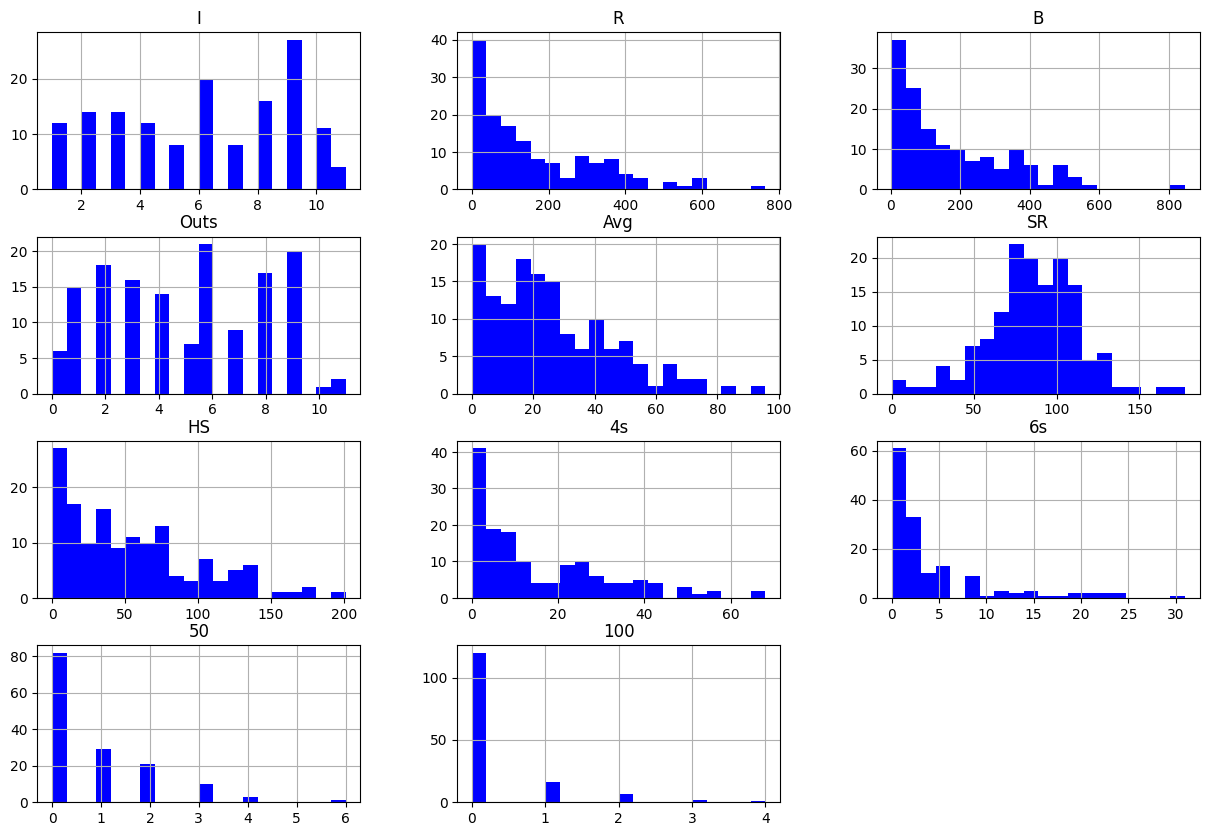

In [20]:
df1.hist(bins = 20, figsize = (15, 10), color = 'blue')
plt.show()

[Text(0.5, 1.0, 'Distribution of balls')]

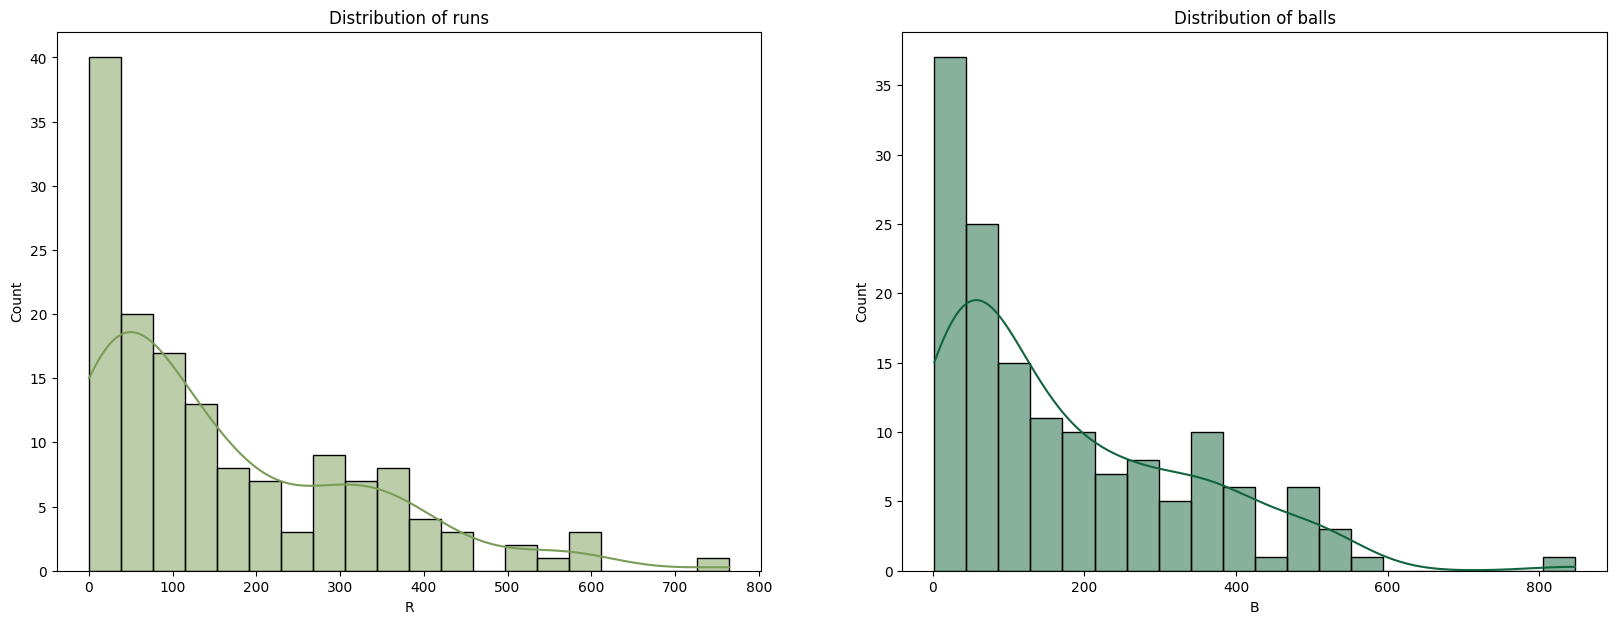

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(ax = axes[0], x = df1["R"],
             bins = 20,    
             kde = True,
             cbar = True,
             color = "#7A9C57").set(title = "Distribution of runs")

sns.histplot(ax = axes[1], x = df1["B"],
             bins = 20,
             kde = True,
             cbar = True,
             color = "#11643D").set(title = "Distribution of balls")


[Text(0.5, 1.0, 'Distribution of sixes')]

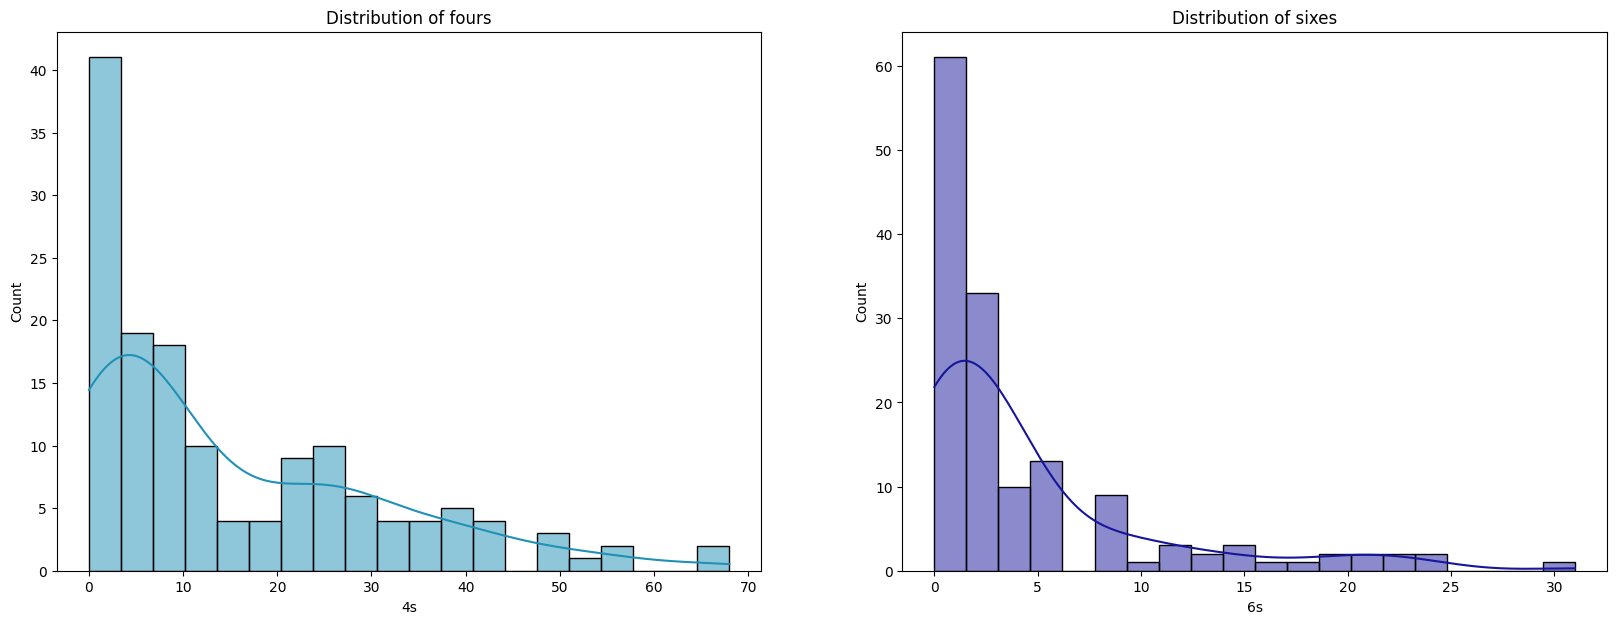

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(ax = axes[0], x = df1["4s"],
             bins = 20,
             kde = True,   
             cbar = True,
             color = "#2091B6").set(title = "Distribution of fours")

sns.histplot(ax = axes[1], x = df1["6s"],
             bins = 20,
             kde = True,   
             cbar = True,
             color = "#16169A").set(title = "Distribution of sixes")

[Text(0.5, 1.0, 'Distribution of High Score')]

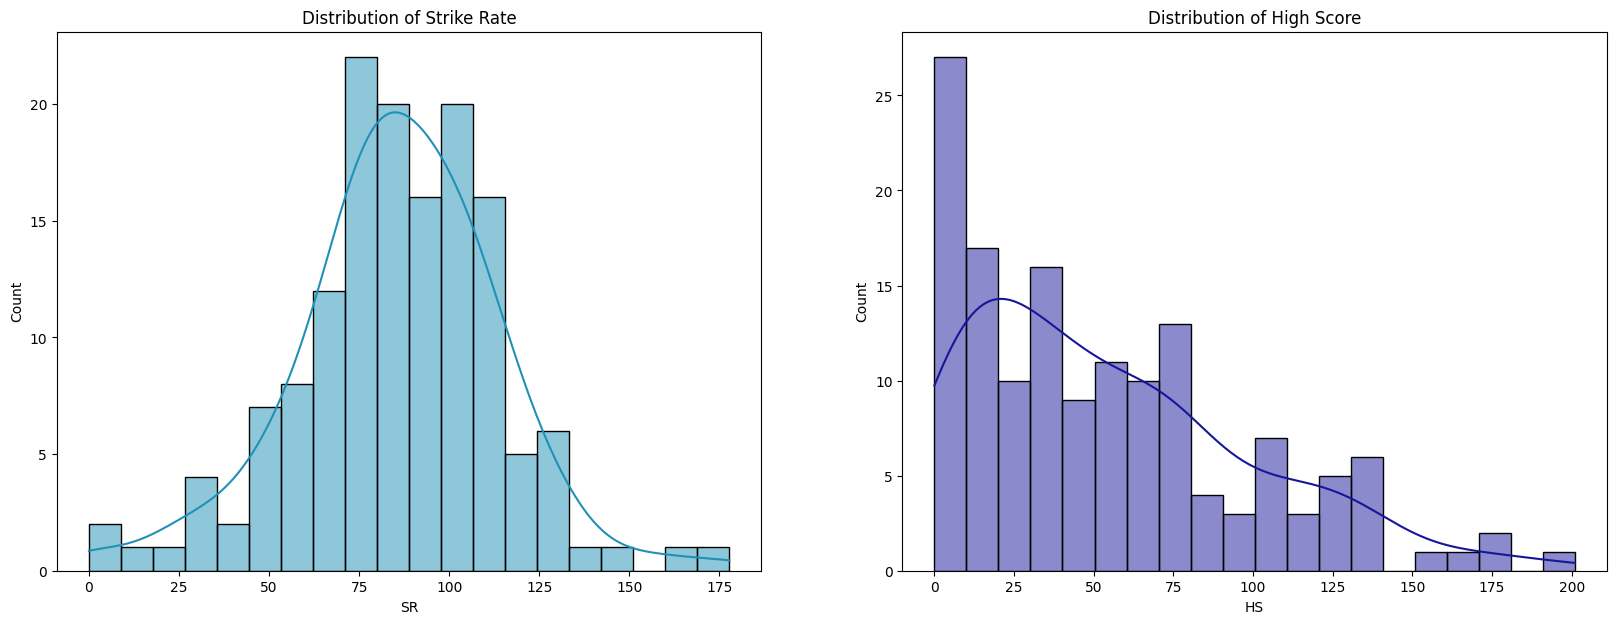

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(ax = axes[0], x = df1["SR"],
             bins = 20,
             kde = True,   
             cbar = True,
             color = "#2091B6").set(title = "Distribution of Strike Rate")

sns.histplot(ax = axes[1], x = df1["HS"],
             bins = 20,
             kde = True,   
             cbar = True,
             color = "#16169A").set(title = "Distribution of High Score")


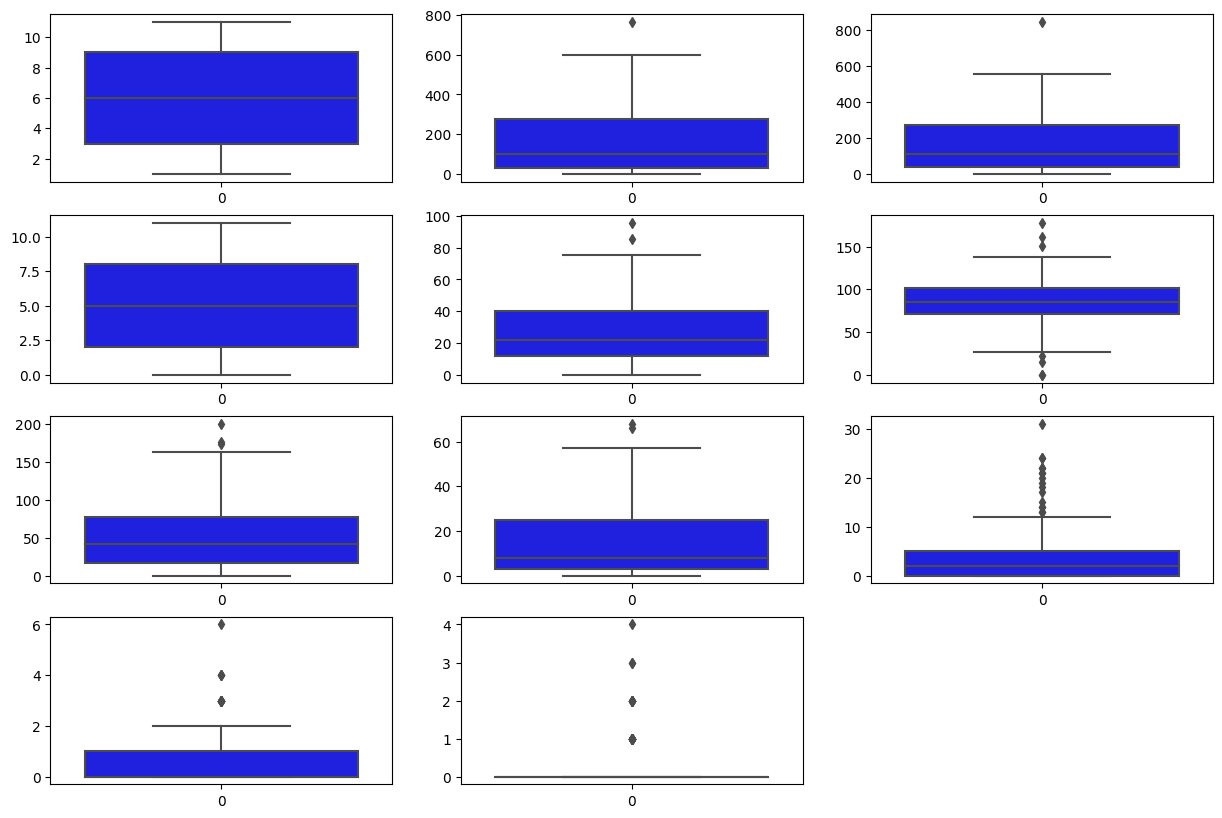

In [24]:
plt.figure(figsize=(15, 10))
col = 1
for i in df1.drop(columns='Player').columns:
    plt.subplot(4, 3, col)
    sns.boxplot(df1[i],color='blue')
    col += 1

In [25]:
df1.shape

(146, 12)

In [26]:
def remove_outliers_iqr(df1):
    Q1 = df1.quantile(0.25)
    Q3 = df1.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df1[~((df1 < lower_bound) | (df1 > upper_bound)).any(axis=1)]


df= remove_outliers_iqr(df1.iloc[0:,1:11])

In [27]:
df.shape

(113, 10)

### The outliers are genuine observations, especially in the context of sports performance data, these are crucial for accurate analysis and insights.

## Correlation

In [28]:
df1.drop(columns=['I', 'Outs', 'Avg', 'HS', '50', '100'], inplace=True)

In [29]:
df_h1 = df1.copy()
df_db1 = df1.copy()

<AxesSubplot: >

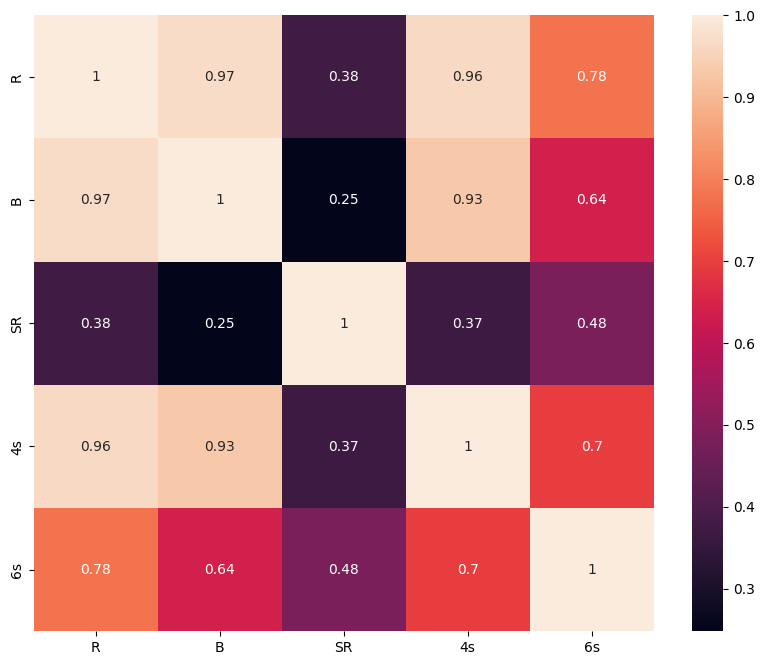

In [30]:
plt.figure(figsize=(10,8))
corr=df1.drop(columns='Player').corr()
sns.heatmap(corr,annot=True)

## Z SCORE

In [31]:
cc = df1.iloc[:, 1:6] 
cc1 = cc.apply(zscore)
cc1.head()

,R,B,SR,4s,6s
0,0.341343,0.424536,0.103405,0.736157,-0.232362
1,1.524044,1.395326,0.549006,2.189428,0.755740
2,0.723062,0.851189,0.102693,0.357042,-0.397045
3,0.053490,-0.150519,0.964355,0.293857,0.097005
4,-0.409578,-0.292736,-0.383483,-0.464372,-0.561729


In [32]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(cc1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [33]:
silhouette_score(cc1,labels)

0.5090975495957553

## STANDARD SCALAR

In [34]:
scaler = StandardScaler()
cc_scaled = scaler.fit_transform(cc)
cc_scaled_df = pd.DataFrame(cc_scaled, columns=cc.columns)
print(cc_scaled_df.head())

          R         B        SR        4s        6s
0  0.341343  0.424536  0.103405  0.736157 -0.232362
1  1.524044  1.395326  0.549006  2.189428  0.755740
2  0.723062  0.851189  0.102693  0.357042 -0.397045
3  0.053490 -0.150519  0.964355  0.293857  0.097005
4 -0.409578 -0.292736 -0.383483 -0.464372 -0.561729


In [35]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(cc1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [36]:
silhouette_score(cc_scaled_df,labels)

0.5090975495957553

## MIN MAX SCALER

In [37]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
cc_min_max_scaled = min_max_scaler.fit_transform(cc)
cc_min_max_scaled_df = pd.DataFrame(cc_min_max_scaled, columns=cc.columns)

print(cc_min_max_scaled_df.head())

          R         B        SR        4s        6s
0  0.281046  0.285207  0.497694  0.397059  0.096774
1  0.528105  0.471006  0.568118  0.735294  0.290323
2  0.360784  0.366864  0.497581  0.308824  0.064516
3  0.220915  0.175148  0.633761  0.294118  0.161290
4  0.124183  0.147929  0.420745  0.117647  0.032258


In [38]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(cc1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [39]:
silhouette_score(cc_min_max_scaled_df,labels)

0.5425728245505061

## K-MEANS Implementation

In [40]:
cc1 = df1.iloc[:, 1:6]
cc1.head()

,R,B,SR,4s,6s
0,215,243,88.48,27,3
1,404,400,101.00,50,9
2,276,312,88.46,21,2
3,169,150,112.67,20,5
4,95,127,74.80,8,1


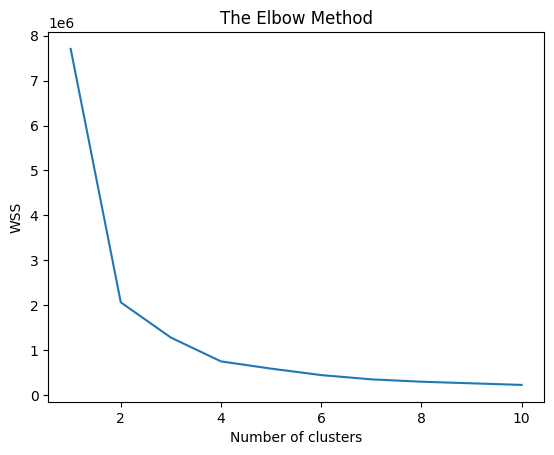

In [41]:
from sklearn.cluster import KMeans
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,random_state=0)
    kmeans.fit(cc1)
    wss.append(kmeans.inertia_)
plt.plot(range(1, 11), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

In [42]:
kmeans = KMeans(n_clusters=2,init='k-means++',random_state=0)
kmeans.fit(cc1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [43]:
silhouette_score(cc1,labels)

0.6612082544384134

In [44]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cc)
    score = silhouette_score(cc,kmeans.labels_)
    silhouette_coefficients.append(score)

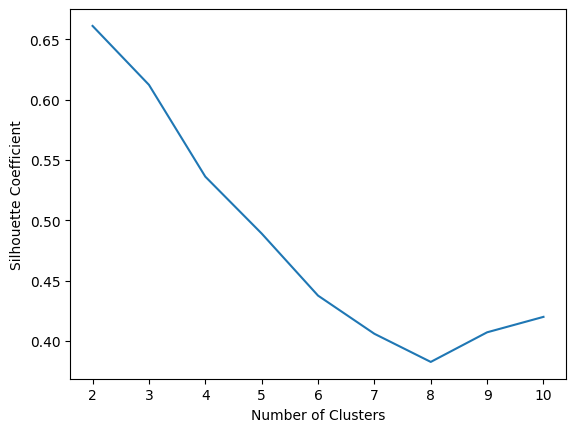

In [45]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [46]:
df1['cluster']=labels
df1.head()

,Player,R,B,SR,4s,6s,cluster
0,JM Bairstow,215,243,88.48,27,3,0
1,DJ Malan,404,400,101.00,50,9,0
2,JE Root,276,312,88.46,21,2,0
3,HC Brook,169,150,112.67,20,5,1
4,MM Ali,95,127,74.80,8,1,1


In [47]:
df1.head(10)

,Player,R,B,SR,4s,6s,cluster
0,JM Bairstow,215,243,88.48,27,3,0
1,DJ Malan,404,400,101.00,50,9,0
2,JE Root,276,312,88.46,21,2,0
3,HC Brook,169,150,112.67,20,5,1
4,MM Ali,95,127,74.80,8,1,1
5,JC Buttler,138,142,97.18,11,5,1
6,LS Livingstone,60,94,63.83,6,0,1
7,SM Curran,35,57,61.40,1,0,1
8,CR Woakes,131,155,84.52,15,2,1
9,AU Rashid,92,90,102.22,7,2,1


In [48]:
aggdata=df1.iloc[:, 1:7].groupby('cluster').mean()
aggdata['Freq']=df1.cluster.value_counts().sort_index()
aggdata

,R,B,SR,4s,6s,Freq
cluster,,,,,,
0,360.042553,376.765957,96.109149,34.787234,9.638298,47
1,65.696970,78.242424,80.573434,6.121212,1.929293,99


In [49]:
df1['cluster'] = df1['cluster'].replace({0: 'Grade A', 1: 'Grade B'})

In [50]:
Grade_A = df1[df1['cluster'] == 'Grade A']
Grade_A.head(10)

,Player,R,B,SR,4s,6s,cluster
0,JM Bairstow,215,243,88.48,27,3,Grade A
1,DJ Malan,404,400,101.00,50,9,Grade A
2,JE Root,276,312,88.46,21,2,Grade A
11,DP Conway,372,366,101.64,54,4,Grade A
12,WA Young,206,246,83.74,23,6,Grade A
13,R Ravindra,578,543,106.45,55,17,Grade A
16,Babar Azam,320,386,82.90,32,4,Grade A
17,Mohammad Rizwan,395,414,95.41,38,5,Grade A
18,Saud Shakeel,241,246,97.97,30,1,Grade A
27,CN Ackermann,216,263,82.13,27,0,Grade A


In [51]:
Grade_B = df1[df1['cluster'] == 'Grade B']
Grade_B.head(10)

,Player,R,B,SR,4s,6s,cluster
3,HC Brook,169,150,112.67,20,5,Grade B
4,MM Ali,95,127,74.80,8,1,Grade B
5,JC Buttler,138,142,97.18,11,5,Grade B
6,LS Livingstone,60,94,63.83,6,0,Grade B
7,SM Curran,35,57,61.40,1,0,Grade B
8,CR Woakes,131,155,84.52,15,2,Grade B
9,AU Rashid,92,90,102.22,7,2,Grade B
10,MA Wood,85,65,130.77,7,5,Grade B
14,Fakhar Zaman,220,179,122.91,14,18,Grade B
15,Imam-ul-Haq,162,180,90.00,23,0,Grade B


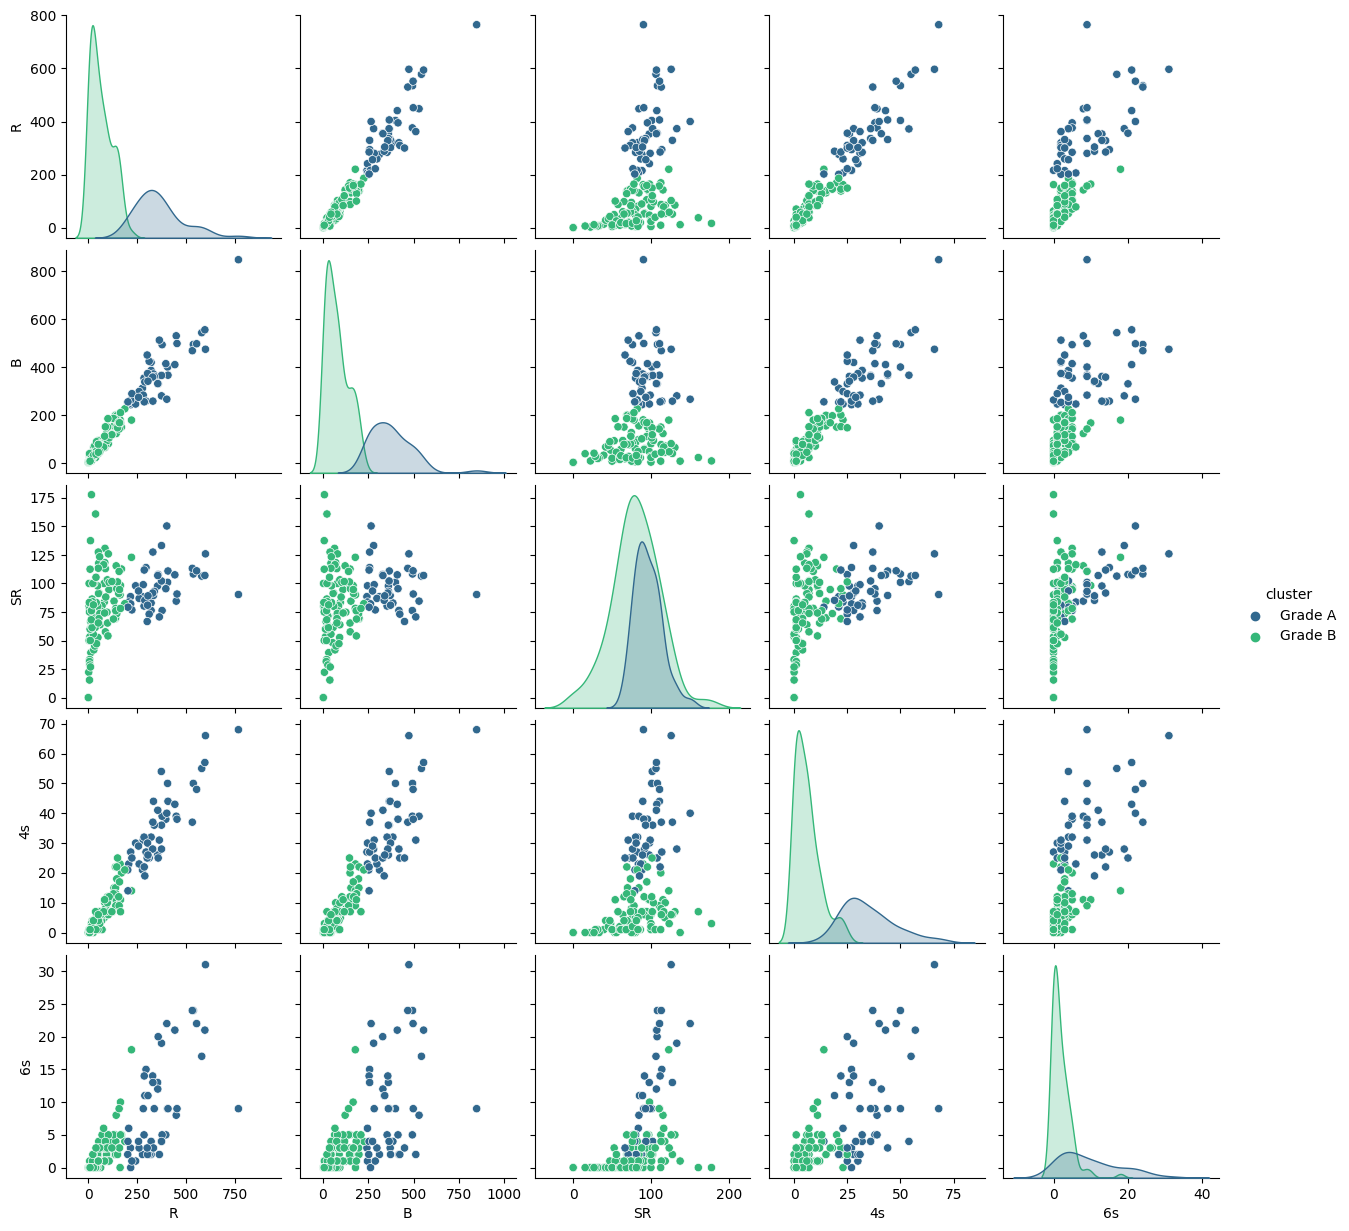

In [52]:
sns.pairplot(df1, hue='cluster', palette='viridis')
plt.show()

## HIERARCHICAL CLUSTERING

In [53]:
cc1 = df_h1.iloc[:,1:6] 
cc1.head()

,R,B,SR,4s,6s
0,215,243,88.48,27,3
1,404,400,101.00,50,9
2,276,312,88.46,21,2
3,169,150,112.67,20,5
4,95,127,74.80,8,1


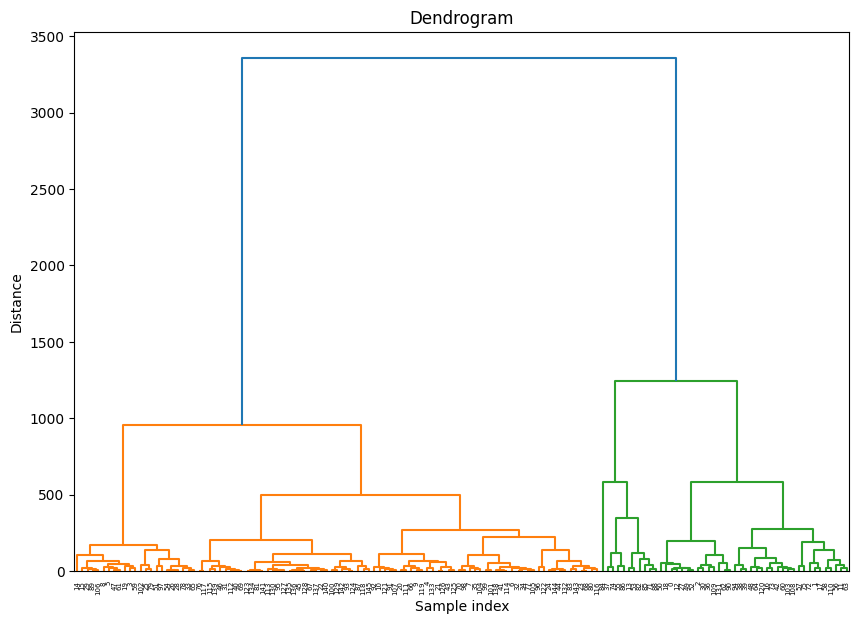

In [54]:
linkage_matrix = linkage(cc1, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [55]:
num_clusters = 2

model = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
clusters = model.fit_predict(cc1)

silhouette_avg = silhouette_score(cc1, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.66


In [56]:
df_h1['Cluster'] = clusters
print(df_h1.head())

        Player    R    B      SR  4s  6s  Cluster
0  JM Bairstow  215  243   88.48  27   3        0
1     DJ Malan  404  400  101.00  50   9        0
2      JE Root  276  312   88.46  21   2        0
3     HC Brook  169  150  112.67  20   5        1
4       MM Ali   95  127   74.80   8   1        1


In [57]:
df_h1.head(10)

,Player,R,B,SR,4s,6s,Cluster
0,JM Bairstow,215,243,88.48,27,3,0
1,DJ Malan,404,400,101.00,50,9,0
2,JE Root,276,312,88.46,21,2,0
3,HC Brook,169,150,112.67,20,5,1
4,MM Ali,95,127,74.80,8,1,1
5,JC Buttler,138,142,97.18,11,5,1
6,LS Livingstone,60,94,63.83,6,0,1
7,SM Curran,35,57,61.40,1,0,1
8,CR Woakes,131,155,84.52,15,2,1
9,AU Rashid,92,90,102.22,7,2,1


In [58]:
aggdata=df_h1.iloc[:, 1:7].groupby('Cluster').mean()
aggdata['Freq']=df_h1.Cluster.value_counts().sort_index()
aggdata

,R,B,SR,4s,6s,Freq
Cluster,,,,,,
0,360.042553,376.765957,96.109149,34.787234,9.638298,47
1,65.696970,78.242424,80.573434,6.121212,1.929293,99


In [59]:
df_h1['Cluster'] = df_h1['Cluster'].replace({0: 'Grade A', 1: 'Grade B'})

In [60]:
Grade_A = df_h1[df_h1['Cluster'] == 'Grade A']
Grade_A.head()

,Player,R,B,SR,4s,6s,Cluster
0,JM Bairstow,215,243,88.48,27,3,Grade A
1,DJ Malan,404,400,101.00,50,9,Grade A
2,JE Root,276,312,88.46,21,2,Grade A
11,DP Conway,372,366,101.64,54,4,Grade A
12,WA Young,206,246,83.74,23,6,Grade A


In [61]:
Grade_B = df_h1[df_h1['Cluster'] == 'Grade B']
Grade_B.head()

,Player,R,B,SR,4s,6s,Cluster
3,HC Brook,169,150,112.67,20,5,Grade B
4,MM Ali,95,127,74.80,8,1,Grade B
5,JC Buttler,138,142,97.18,11,5,Grade B
6,LS Livingstone,60,94,63.83,6,0,Grade B
7,SM Curran,35,57,61.40,1,0,Grade B


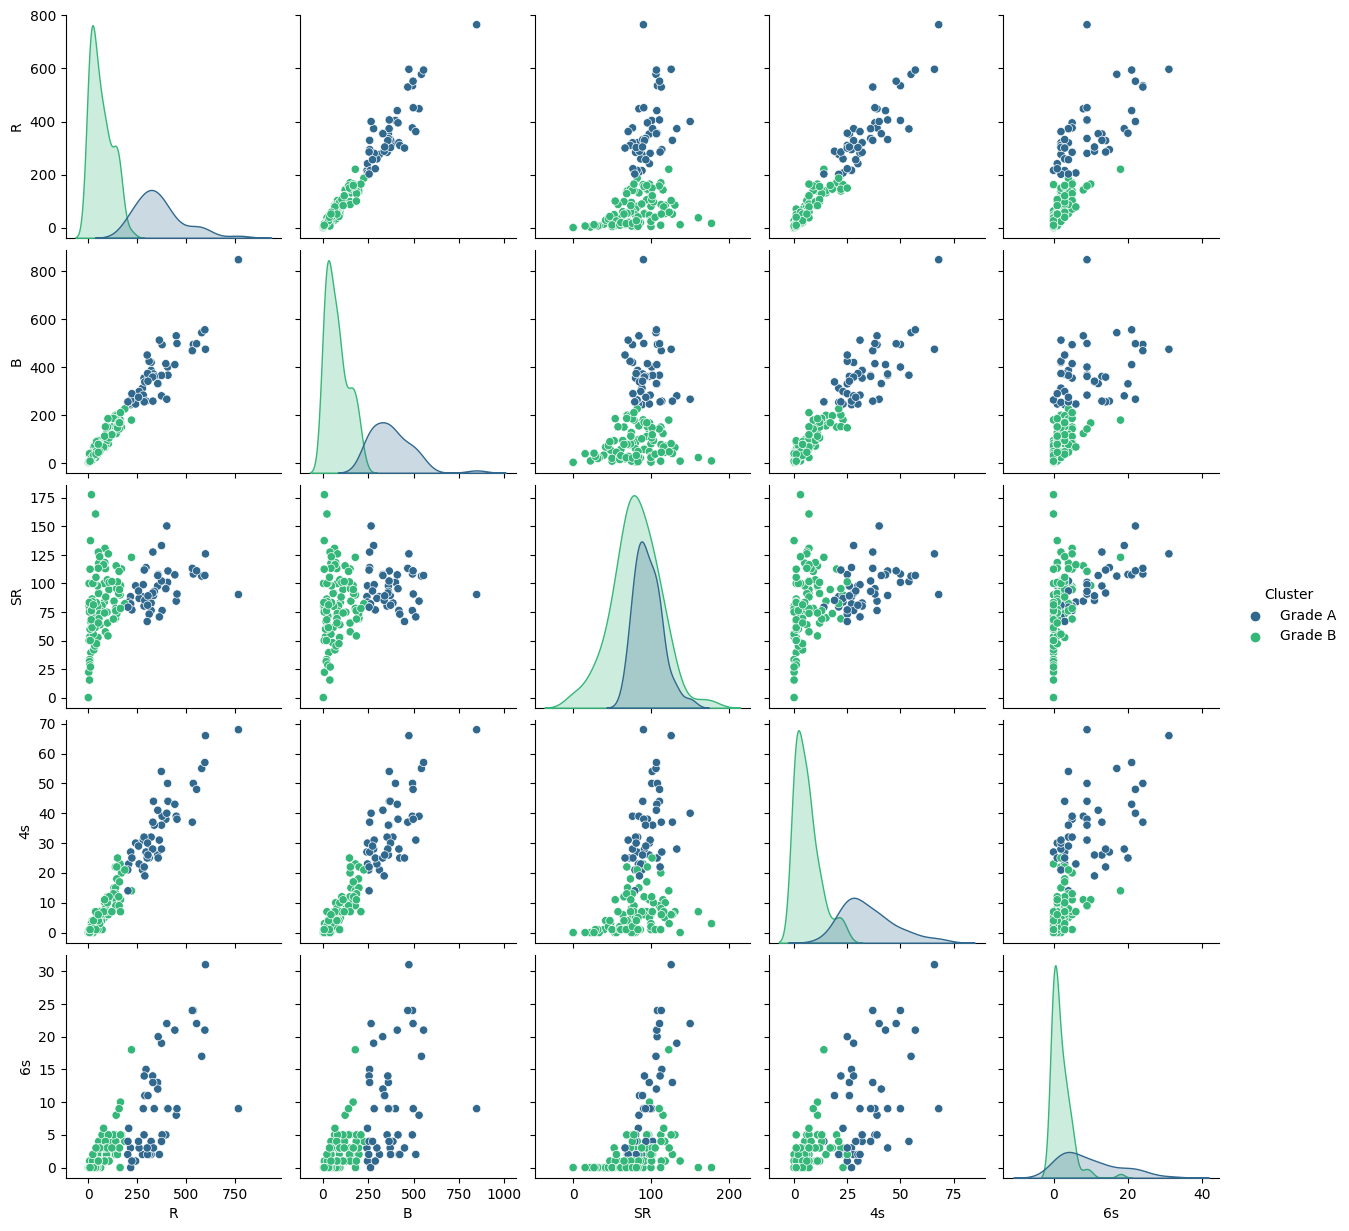

In [62]:
sns.pairplot(df_h1, hue='Cluster', palette='viridis')
plt.show()

## DB SCAN CLUSTERING

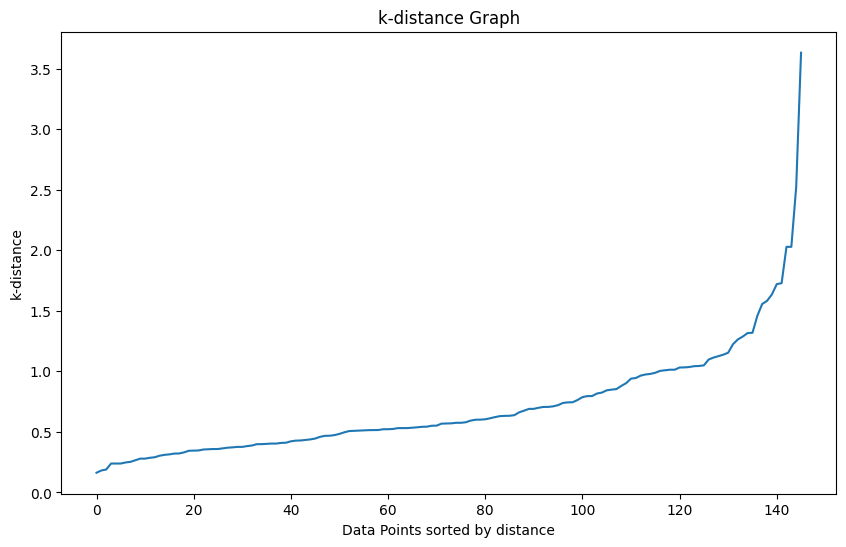

In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_db1.iloc[:, 1:6])

min_samples = 6


neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_train_scaled)
distances, indices = neighbors_fit.kneighbors(X_train_scaled)

distances = np.sort(distances[:, min_samples-1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('k-distance')
plt.title('k-distance Graph')
plt.show()

Estimated number of clusters: 2
Estimated number of noise points: 2
Silhouette Score: 0.48


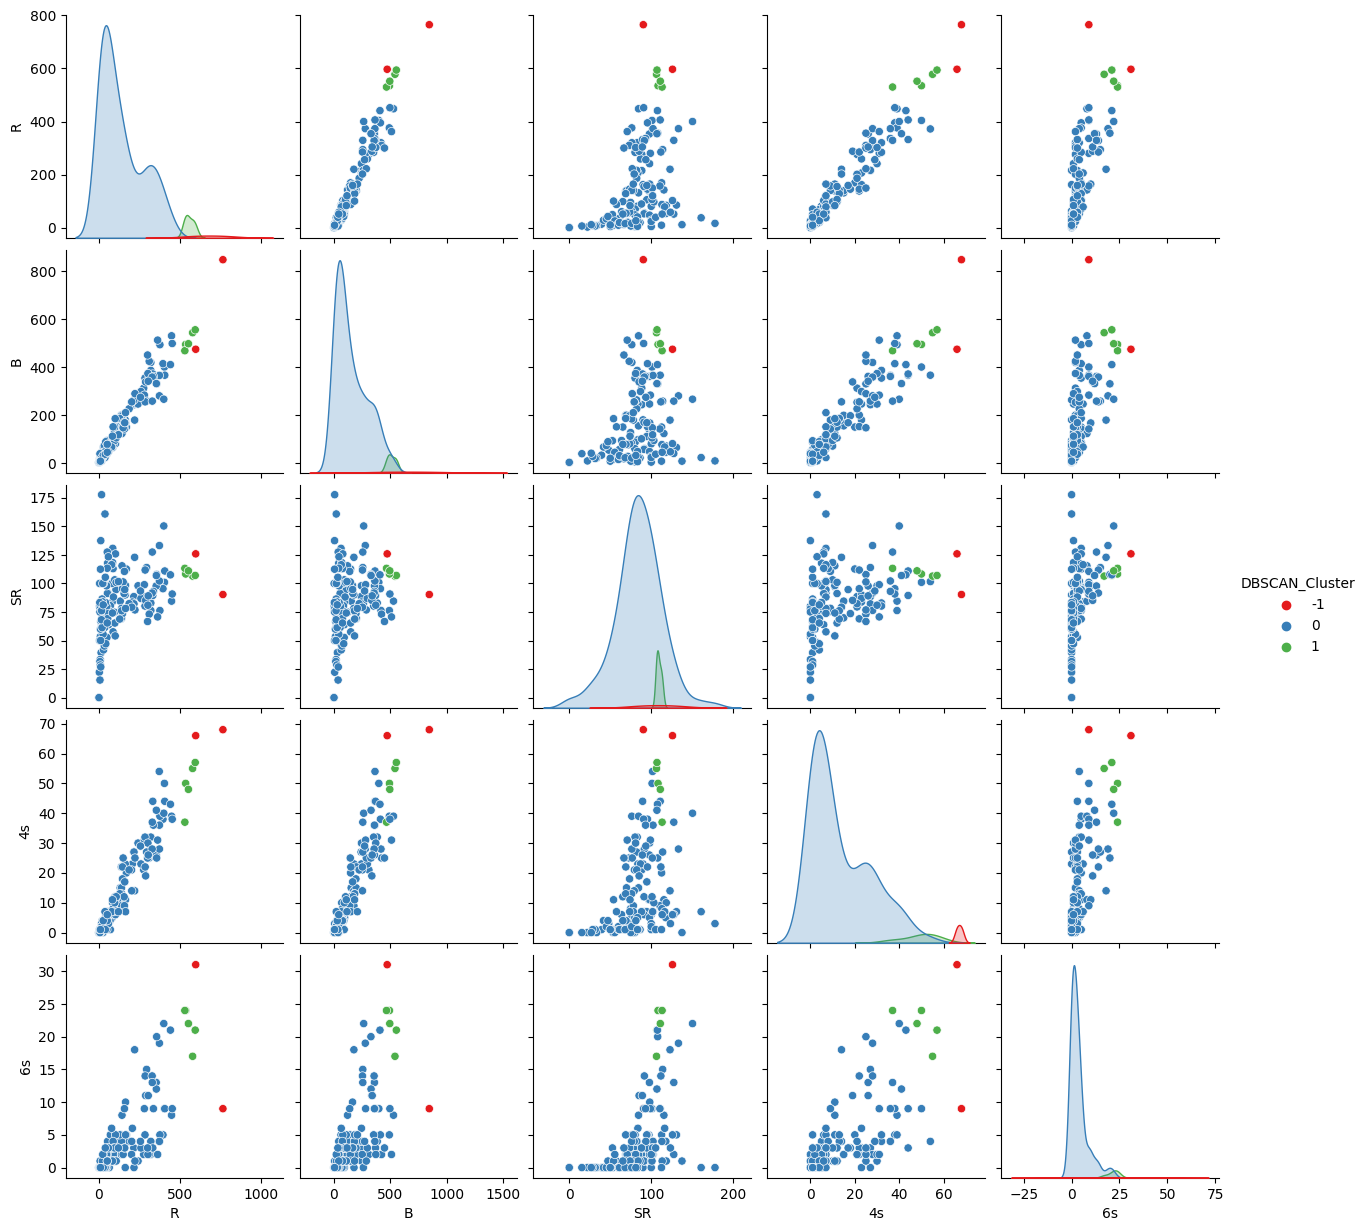

In [64]:
epsilon = 1.5

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
train_labels = dbscan.fit_predict(X_train_scaled)


n_clusters = len(set(train_labels)) - (1 if -1 in train_labels else 0)
n_noise = list(train_labels).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

df_db1['DBSCAN_Cluster'] = dbscan.labels_

if len(set(dbscan.labels_)) > 1:
    silhouette_avg = silhouette_score(X_train_scaled, dbscan.labels_)
    print(f'Silhouette Score: {silhouette_avg:.2f}')
else:
    print("DBSCAN did not find more than one cluster.")
    
sns.pairplot(df_db1, hue='DBSCAN_Cluster', palette='Set1')
plt.show()

## BOWLING DATA

Text(0.5, 1.0, 'Top 10 Players by taking Wickets')

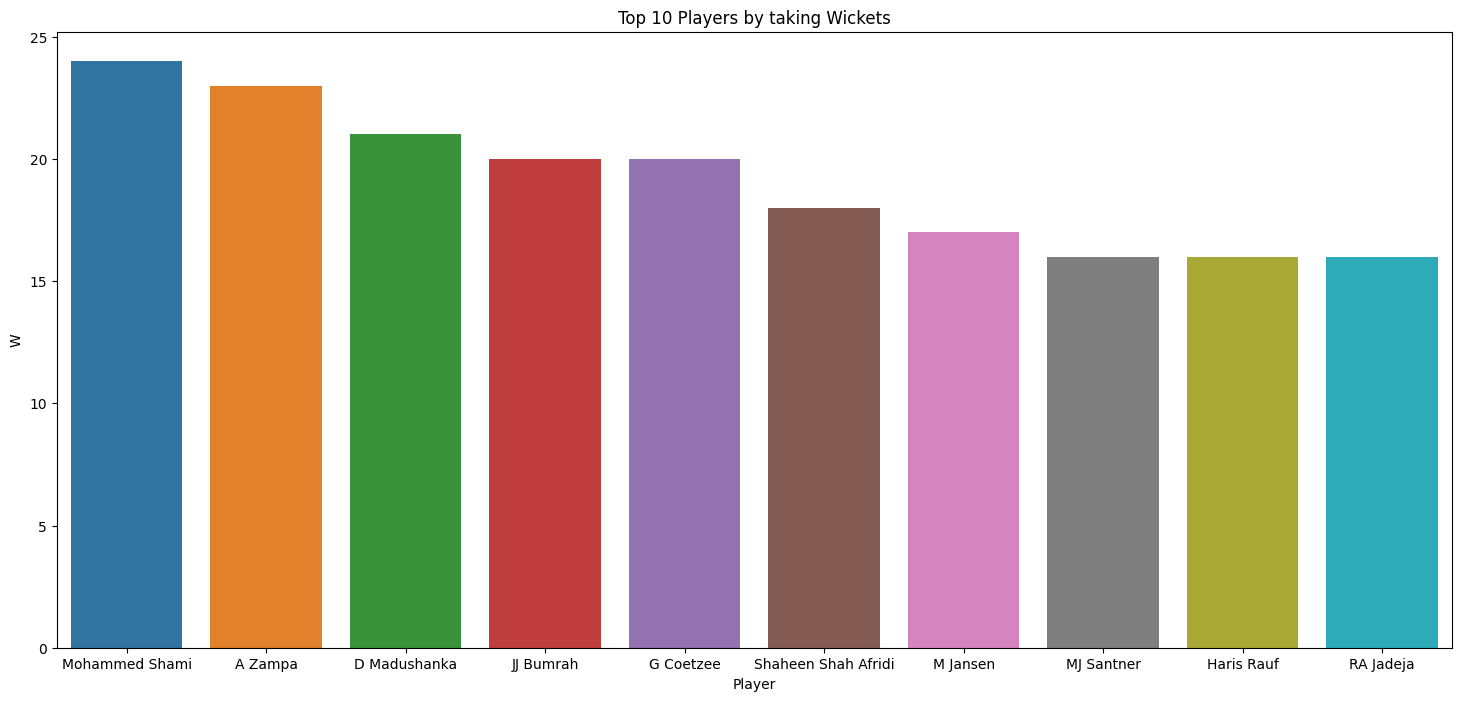

In [65]:
plt.figure(figsize=(18,8))
b1=df2.groupby('Player')['W'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Player' ,'W']
sns.barplot(data= b1 , x= 'Player' , y ='W')
plt.title("Top 10 Players by taking Wickets")

Text(0.5, 1.0, 'Top 10 Players by Maiden Overs')

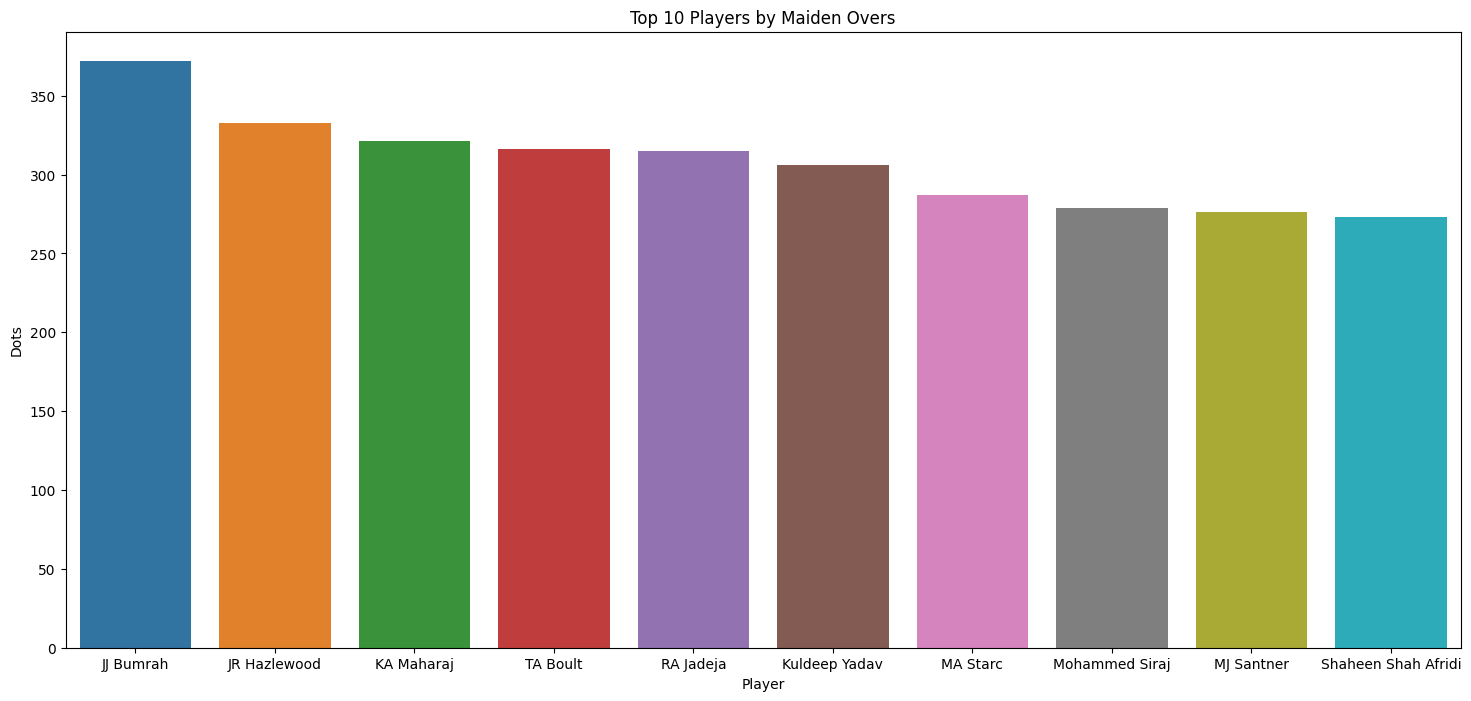

In [66]:
plt.figure(figsize=(18,8))
b1=df2.groupby('Player')['Dots'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Player' ,'Dots']
sns.barplot(data= b1 , x= 'Player' , y ='Dots')
plt.title("Top 10 Players by Maiden Overs")

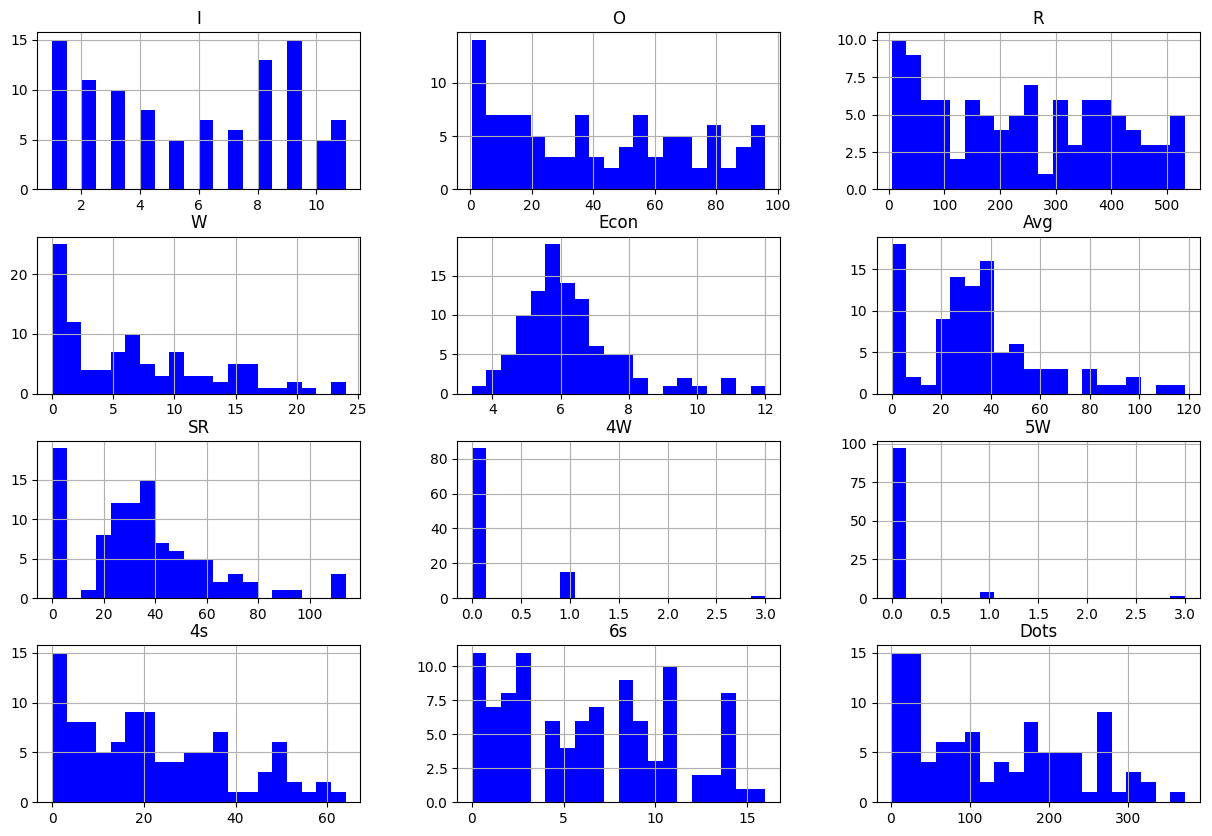

In [67]:
df2.hist(bins = 20, figsize = (15, 10), color = 'blue')
plt.show()

In [68]:
df2.head()

,Player,I,O,R,W,Econ,Avg,SR,4W,5W,BBI,4s,6s,Dots
0,A Dutt,9,77.3,426,10,5.50,42.60,46.50,0,0,3/44,46,10,266
1,A Zampa,11,96.0,515,23,5.36,22.39,25.04,3,0,4/8,33,14,261
2,AAP Atkinson,3,24.0,146,4,6.08,36.50,36.00,0,0,2/45,13,7,81
3,AD Mathews,5,22.1,107,6,4.83,17.83,22.17,0,0,2/14,11,0,69
4,Agha Salman,2,5.0,46,0,9.20,0.00,0.00,0,0,0/21,5,2,10


[Text(0.5, 1.0, 'Distribution of Economy')]

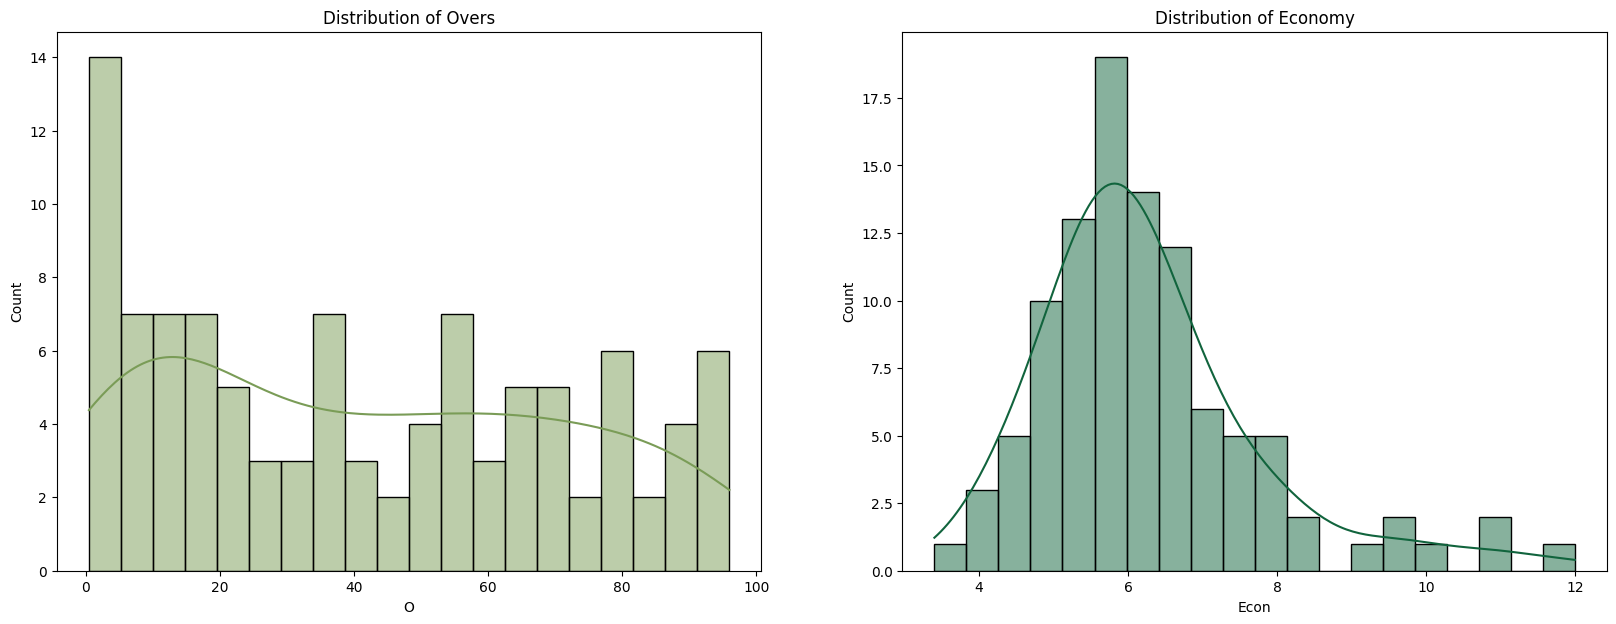

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(ax = axes[0], x = df2["O"],
             bins = 20,    
             kde = True,
             cbar = True,
             color = "#7A9C57").set(title = "Distribution of Overs")

sns.histplot(ax = axes[1], x = df2["Econ"],
             bins = 20,
             kde = True,
             cbar = True,
             color = "#11643D").set(title = "Distribution of Economy")


[Text(0.5, 1.0, 'Distribution of Wickets')]

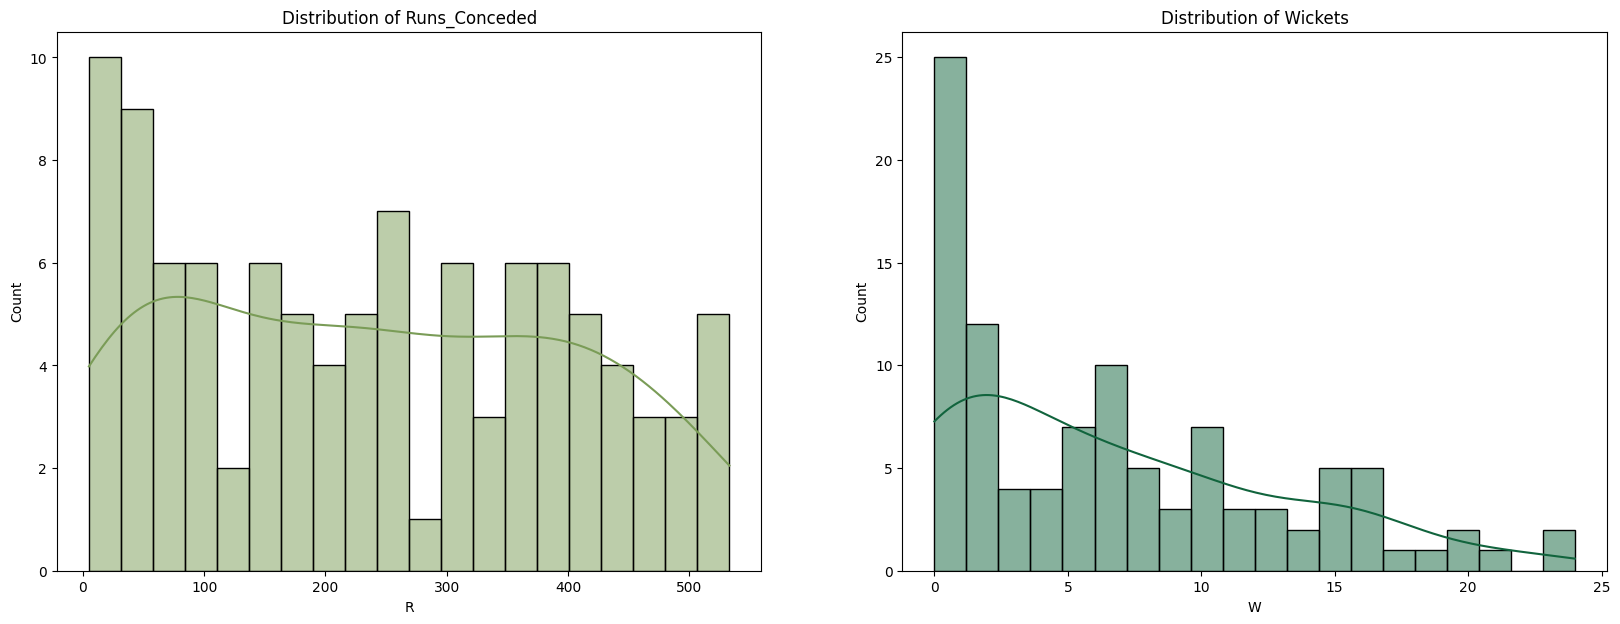

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(ax = axes[0], x = df2["R"],
             bins = 20,    
             kde = True,
             cbar = True,
             color = "#7A9C57").set(title = "Distribution of Runs_Conceded")

sns.histplot(ax = axes[1], x = df2["W"],
             bins = 20,
             kde = True,
             cbar = True,
             color = "#11643D").set(title = "Distribution of Wickets")


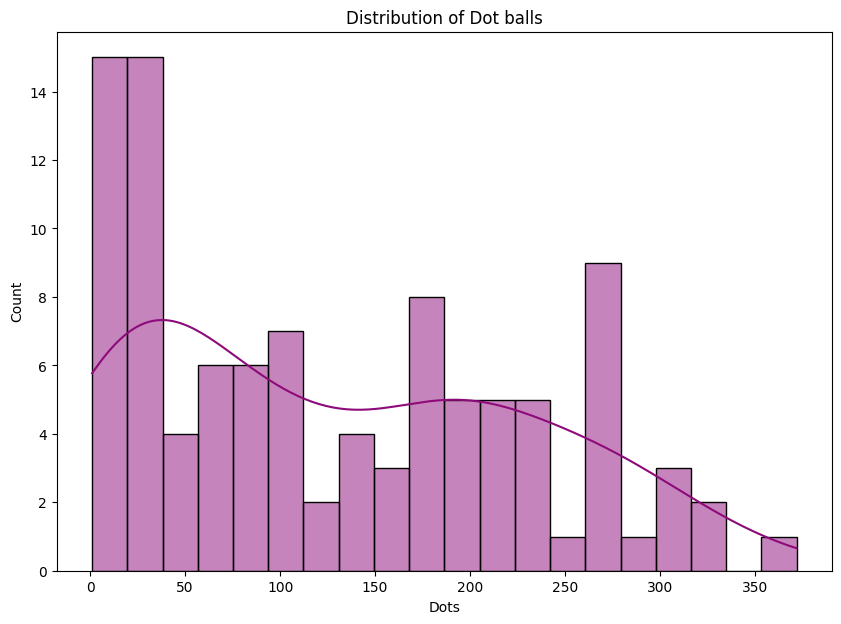

In [71]:
plt.figure(figsize=(10, 7))  

sns.histplot(df2["Dots"],
             bins=20,
             kde=True,   
             cbar=True,
             color="#8E0A7A")

plt.title("Distribution of Dot balls")
plt.show()


In [72]:
df2.drop(columns=['I', 'SR', '4W', '5W', 'BBI', '4s', '6s'], inplace=True)

In [73]:
df_h2 = df2.copy()
df_db2 = df2.copy()

<AxesSubplot: >

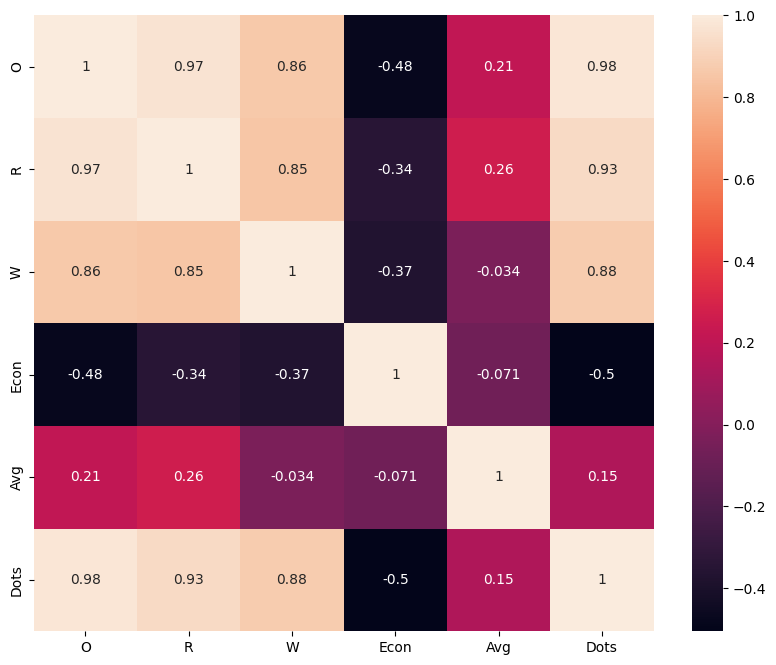

In [74]:
plt.figure(figsize=(10,8))
corr=df2.drop(columns='Player').corr()
sns.heatmap(corr,annot=True)

## Z SCORE

In [76]:
df2.head()

,Player,O,R,W,Econ,Avg,Dots
0,A Dutt,77.3,426,10,5.50,42.60,266
1,A Zampa,96.0,515,23,5.36,22.39,261
2,AAP Atkinson,24.0,146,4,6.08,36.50,81
3,AD Mathews,22.1,107,6,4.83,17.83,69
4,Agha Salman,5.0,46,0,9.20,0.00,10


In [77]:
cc = df2.iloc[:, [1, 2, 3, 6]] 
cc1 = cc.apply(zscore)
cc1.head()

,O,R,W,Dots
0,1.200945,1.170477,0.524743,1.360587
1,1.826610,1.725048,2.626888,1.310874
2,-0.582366,-0.574242,-0.445477,-0.478808
3,-0.645936,-0.817257,-0.122070,-0.598120
4,-1.218068,-1.197356,-1.092291,-1.184738


In [78]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(cc1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [79]:
silhouette_score(cc1,labels)

0.6041038604954796

## STANDARD SCALER

In [80]:
scaler = StandardScaler()
cc_scaled = scaler.fit_transform(cc)
cc_scaled_df = pd.DataFrame(cc_scaled, columns=cc.columns)
print(cc_scaled_df.head())

          O         R         W      Dots
0  1.200945  1.170477  0.524743  1.360587
1  1.826610  1.725048  2.626888  1.310874
2 -0.582366 -0.574242 -0.445477 -0.478808
3 -0.645936 -0.817257 -0.122070 -0.598120
4 -1.218068 -1.197356 -1.092291 -1.184738


In [81]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(cc1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [82]:
silhouette_score(cc_scaled_df,labels)

0.6041038604954796

## MIN MAX SCALER

In [83]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
cc_min_max_scaled = min_max_scaler.fit_transform(cc)
cc_min_max_scaled_df = pd.DataFrame(cc_min_max_scaled, columns=cc.columns)

print(cc_min_max_scaled_df.head())


          O         R         W      Dots
0  0.804188  0.797348  0.416667  0.714286
1  1.000000  0.965909  0.958333  0.700809
2  0.246073  0.267045  0.166667  0.215633
3  0.226178  0.193182  0.250000  0.183288
4  0.047120  0.077652  0.000000  0.024259


In [84]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(cc1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [85]:
silhouette_score(cc_min_max_scaled_df,labels)

0.608476851380156

## K-MEANS Implementation

In [86]:
cc2 = df2.iloc[:, [1, 2, 3, 6]] 

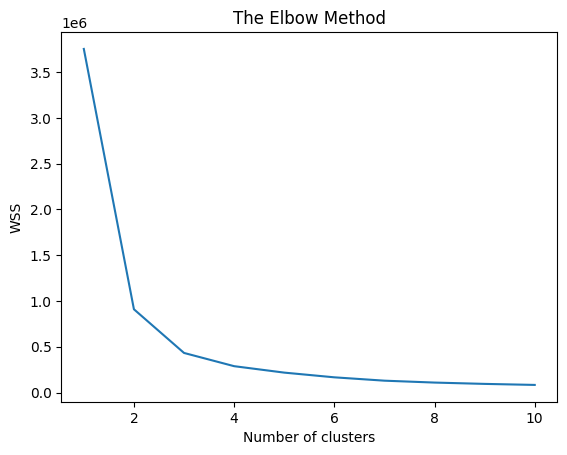

In [87]:
from sklearn.cluster import KMeans
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,init='k-means++',random_state=0)
    kmeans.fit(cc2)
    wss.append(kmeans.inertia_)
plt.plot(range(1, 11), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

In [88]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(cc2)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [89]:
silhouette_score(cc2,labels)

0.6238890457768984

In [90]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cc)
    score = silhouette_score(cc,kmeans.labels_)
    silhouette_coefficients.append(score)

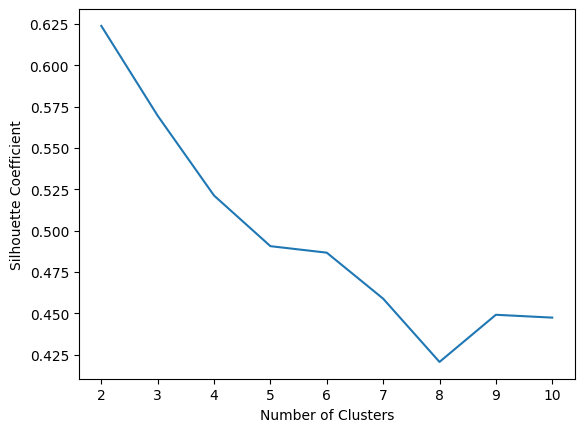

In [91]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [92]:
df2['cluster']=labels
df2.head()

,Player,O,R,W,Econ,Avg,Dots,cluster
0,A Dutt,77.3,426,10,5.50,42.60,266,0
1,A Zampa,96.0,515,23,5.36,22.39,261,0
2,AAP Atkinson,24.0,146,4,6.08,36.50,81,1
3,AD Mathews,22.1,107,6,4.83,17.83,69,1
4,Agha Salman,5.0,46,0,9.20,0.00,10,1


In [93]:
df2.cluster.value_counts().sort_index()

0    45
1    57
Name: cluster, dtype: int64

In [94]:
df2.head(10)

,Player,O,R,W,Econ,Avg,Dots,cluster
0,A Dutt,77.3,426,10,5.50,42.60,266,0
1,A Zampa,96.0,515,23,5.36,22.39,261,0
2,AAP Atkinson,24.0,146,4,6.08,36.50,81,1
3,AD Mathews,22.1,107,6,4.83,17.83,69,1
4,Agha Salman,5.0,46,0,9.20,0.00,10,1
5,AK Markram,18.3,85,1,4.59,85.00,63,1
6,AL Phehlukwayo,7.0,36,1,5.14,36.00,20,1
7,AU Rashid,79.4,413,15,5.18,27.53,221,0
8,Azmatullah Omarzai,38.0,270,7,7.11,38.57,110,1
9,BFW de Leede,67.0,487,16,7.27,30.44,183,0


In [95]:
aggdata = df2.iloc[:, 0:8] .groupby('cluster').mean()
aggdata['Freq']=df2.cluster.value_counts().sort_index()
aggdata

,O,R,W,Econ,Avg,Dots,Freq
cluster,,,,,,,
0,71.084444,394.555556,12.20000,5.603778,37.459333,228.911111,45
1,17.975439,114.684211,2.45614,6.779298,32.664737,50.403509,57


In [96]:
df2['cluster'] = df2['cluster'].replace({0: 'Grade A', 1: 'Grade B'})

In [97]:
Grade_A = df2[df2['cluster'] == 'Grade A']
Grade_A.head(10)

,Player,O,R,W,Econ,Avg,Dots,cluster
0,A Dutt,77.3,426,10,5.50,42.60,266,Grade A
1,A Zampa,96.0,515,23,5.36,22.39,261,Grade A
7,AU Rashid,79.4,413,15,5.18,27.53,221,Grade A
9,BFW de Leede,67.0,487,16,7.27,30.44,183,Grade A
12,CAK Rajitha,49.0,336,8,6.86,42.00,150,Grade A
15,CR Woakes,55.0,298,10,5.42,29.80,198,Grade A
16,D Madushanka,78.2,525,21,6.70,25.00,242,Grade A
18,DJ Willey,51.0,259,11,5.08,23.55,185,Grade A
22,G Coetzee,63.3,396,20,6.24,19.80,214,Grade A
24,GJ Maxwell,68.3,330,6,4.82,55.00,196,Grade A


In [98]:
Grade_B = df2[df2['cluster'] == 'Grade B']
Grade_B.head(10)

,Player,O,R,W,Econ,Avg,Dots,cluster
2,AAP Atkinson,24.0,146,4,6.08,36.50,81,Grade B
3,AD Mathews,22.1,107,6,4.83,17.83,69,Grade B
4,Agha Salman,5.0,46,0,9.20,0.00,10,Grade B
5,AK Markram,18.3,85,1,4.59,85.00,63,Grade B
6,AL Phehlukwayo,7.0,36,1,5.14,36.00,20,Grade B
8,Azmatullah Omarzai,38.0,270,7,7.11,38.57,110,Grade B
10,C Green,2.0,11,0,5.50,0.00,7,Grade B
11,C Karunaratne,12.0,73,0,6.08,0.00,34,Grade B
13,CBRLS Kumara,11.0,82,3,7.45,27.33,33,Grade B
14,CN Ackermann,47.2,234,5,4.94,46.80,140,Grade B


In [99]:
df2_subset = df2.iloc[:, [1, 2, 3, 6]].copy()
df2_subset['cluster'] = df2['cluster']

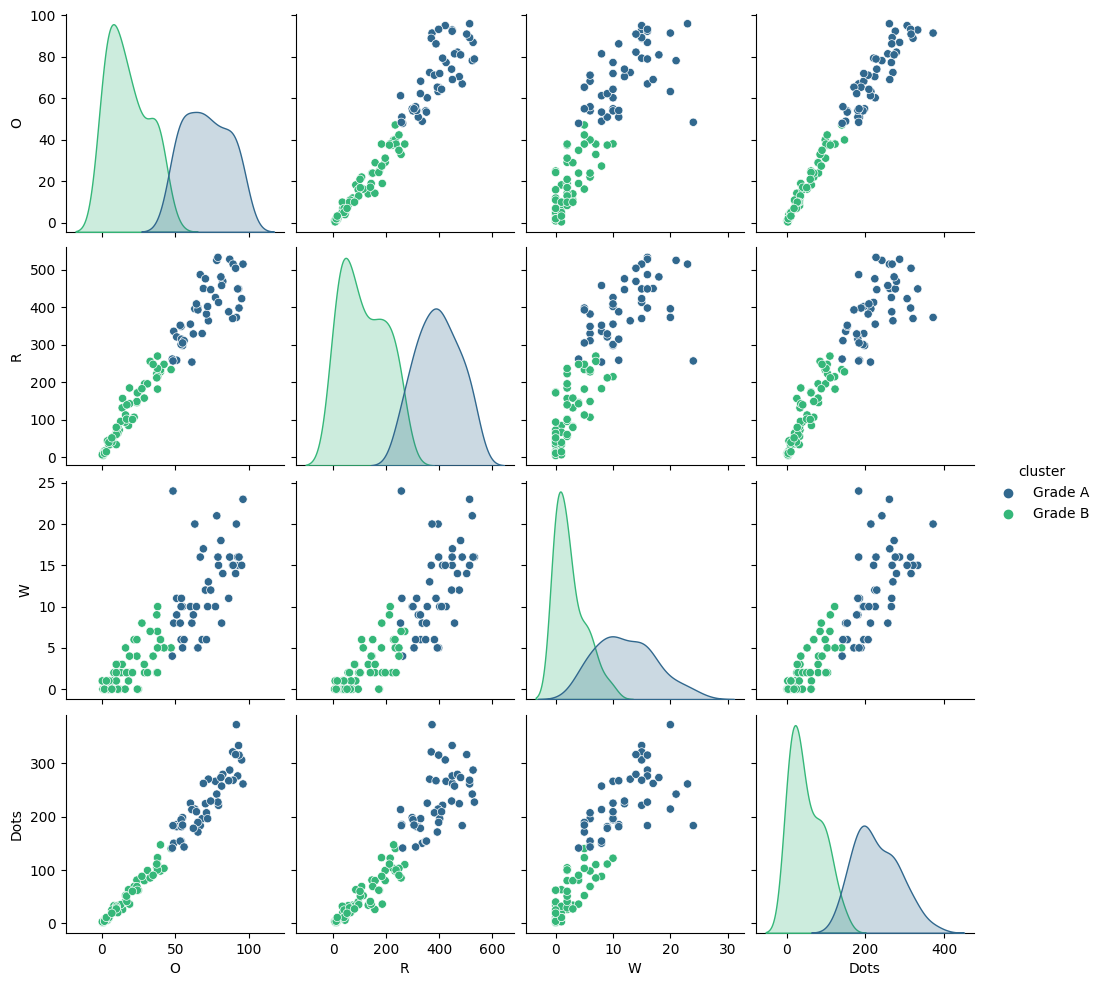

In [100]:
sns.pairplot(df2_subset, hue='cluster', palette='viridis')
plt.show()

## HIERARCHICAL CLUSTERING

In [101]:
cc = df_h2.iloc[:, [1, 2, 3, 6]] 
cc.head()

,O,R,W,Dots
0,77.3,426,10,266
1,96.0,515,23,261
2,24.0,146,4,81
3,22.1,107,6,69
4,5.0,46,0,10


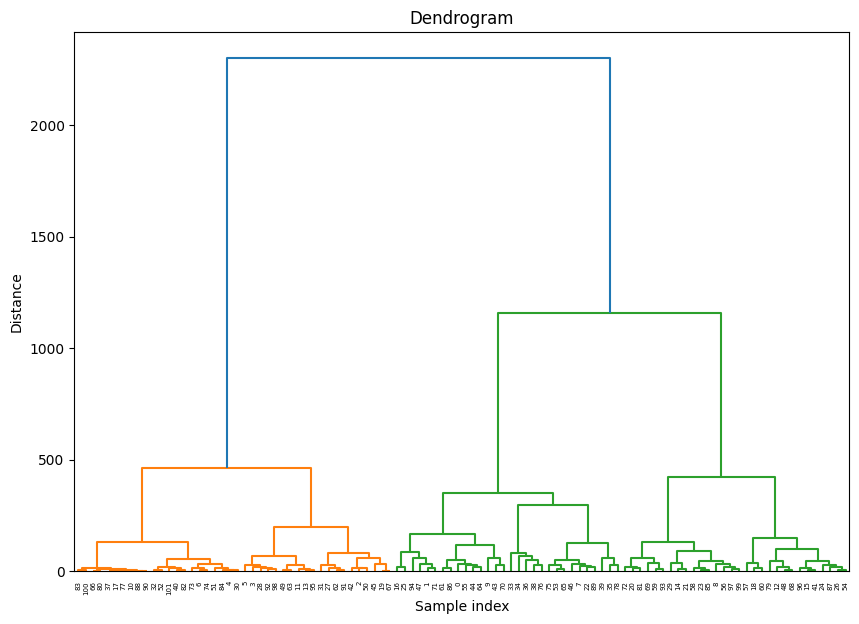

In [102]:
linkage_matrix = linkage(cc, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [103]:
num_clusters = 2

model = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
clusters = model.fit_predict(cc)

silhouette_avg = silhouette_score(cc, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.58


In [104]:
df_h2['Cluster'] = clusters
print(df_h2.head())

         Player     O    R   W  Econ    Avg  Dots  Cluster
0        A Dutt  77.3  426  10  5.50  42.60   266        0
1       A Zampa  96.0  515  23  5.36  22.39   261        0
2  AAP Atkinson  24.0  146   4  6.08  36.50    81        1
3    AD Mathews  22.1  107   6  4.83  17.83    69        1
4   Agha Salman   5.0   46   0  9.20   0.00    10        1


In [105]:
df_h2.head(10)

,Player,O,R,W,Econ,Avg,Dots,Cluster
0,A Dutt,77.3,426,10,5.50,42.60,266,0
1,A Zampa,96.0,515,23,5.36,22.39,261,0
2,AAP Atkinson,24.0,146,4,6.08,36.50,81,1
3,AD Mathews,22.1,107,6,4.83,17.83,69,1
4,Agha Salman,5.0,46,0,9.20,0.00,10,1
5,AK Markram,18.3,85,1,4.59,85.00,63,1
6,AL Phehlukwayo,7.0,36,1,5.14,36.00,20,1
7,AU Rashid,79.4,413,15,5.18,27.53,221,0
8,Azmatullah Omarzai,38.0,270,7,7.11,38.57,110,0
9,BFW de Leede,67.0,487,16,7.27,30.44,183,0


In [106]:
aggdata=df_h2.iloc[:, 0:8].groupby('Cluster').mean()
aggdata['Freq']=df_h2.Cluster.value_counts().sort_index()
aggdata

,O,R,W,Econ,Avg,Dots,Freq
Cluster,,,,,,,
0,62.521667,351.933333,10.483333,5.735000,42.106333,198.350000,60
1,11.240476,75.619048,1.428571,7.011667,24.313810,30.309524,42


In [107]:
df_h2['Cluster'] = df_h2['Cluster'].replace({0: 'Grade A', 1: 'Grade B'})

In [108]:
Grade_A = df_h2[df_h2['Cluster'] == 'Grade A']
Grade_A.head()

,Player,O,R,W,Econ,Avg,Dots,Cluster
0,A Dutt,77.3,426,10,5.50,42.60,266,Grade A
1,A Zampa,96.0,515,23,5.36,22.39,261,Grade A
7,AU Rashid,79.4,413,15,5.18,27.53,221,Grade A
8,Azmatullah Omarzai,38.0,270,7,7.11,38.57,110,Grade A
9,BFW de Leede,67.0,487,16,7.27,30.44,183,Grade A


In [109]:
Grade_B = df_h2[df_h2['Cluster'] == 'Grade B']
Grade_B.head()

,Player,O,R,W,Econ,Avg,Dots,Cluster
2,AAP Atkinson,24.0,146,4,6.08,36.50,81,Grade B
3,AD Mathews,22.1,107,6,4.83,17.83,69,Grade B
4,Agha Salman,5.0,46,0,9.20,0.00,10,Grade B
5,AK Markram,18.3,85,1,4.59,85.00,63,Grade B
6,AL Phehlukwayo,7.0,36,1,5.14,36.00,20,Grade B


In [110]:
df_h2_subset = df_h2.iloc[:, [1, 2, 3, 6]].copy()
df_h2_subset['Cluster'] = df_h2['Cluster']

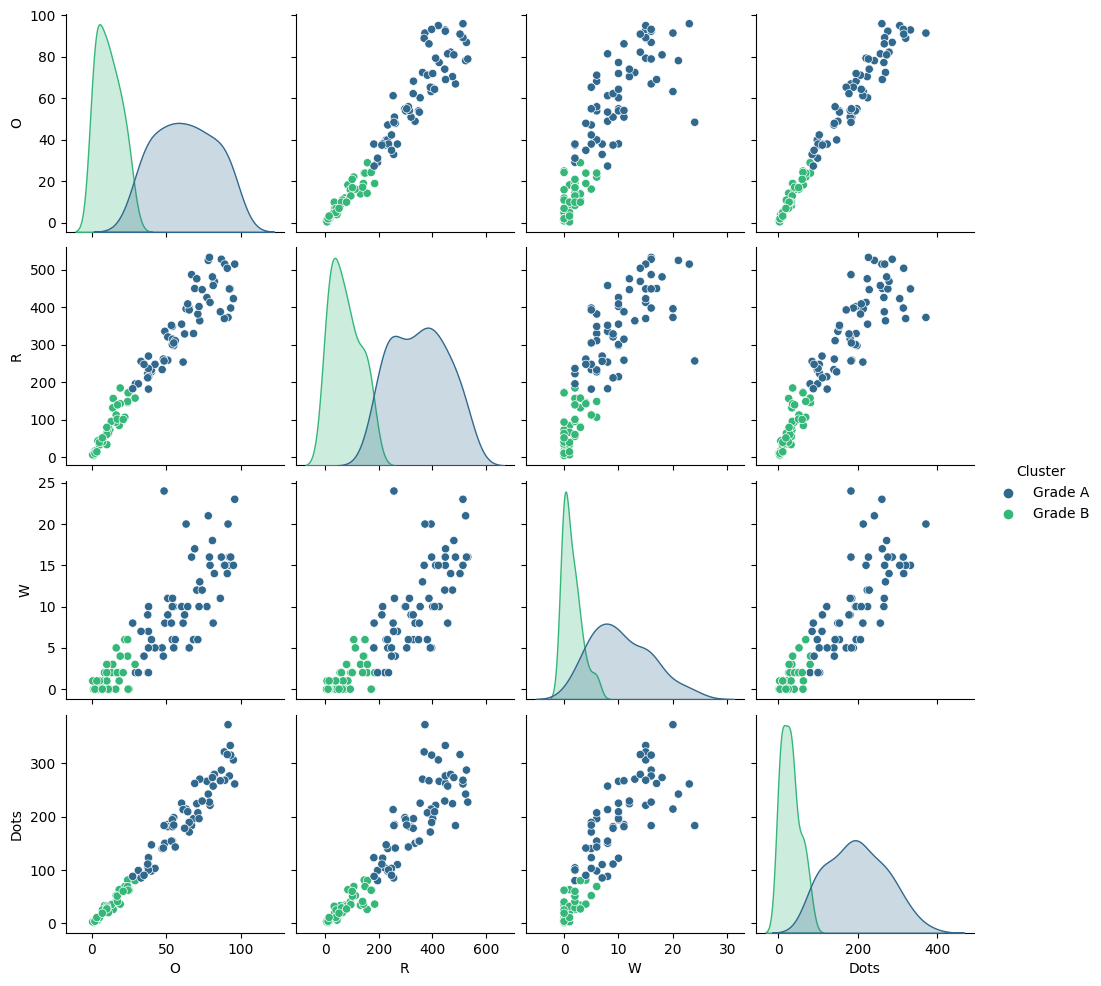

In [111]:
sns.pairplot(df_h2_subset, hue='Cluster', palette='viridis')
plt.show()

## DB SCAN CLUSTERING

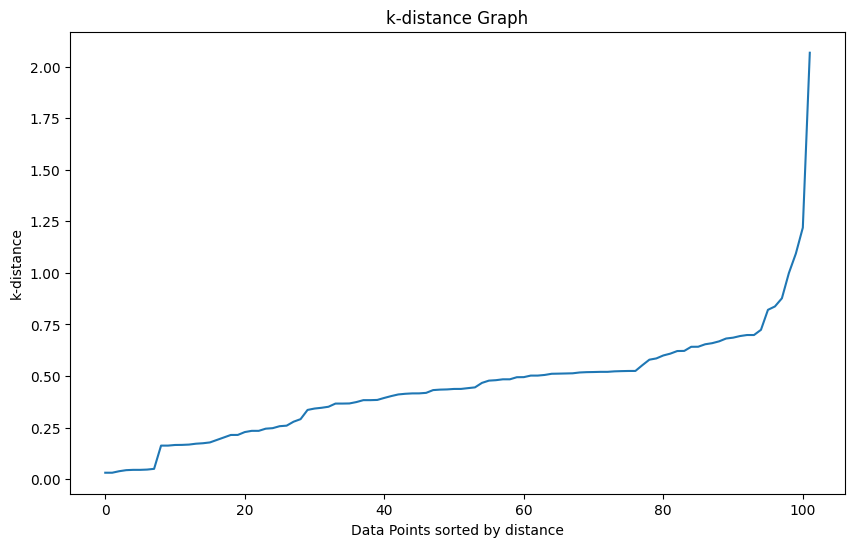

In [152]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_db2.iloc[:, [1, 2, 3, 6]] )

min_samples = 5


neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_train_scaled)

distances, indices = neighbors_fit.kneighbors(X_train_scaled)
distances = np.sort(distances[:, min_samples-1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('k-distance')
plt.title('k-distance Graph')
plt.show()

Estimated number of clusters: 2
Estimated number of noise points: 9
Silhouette Score: 0.36


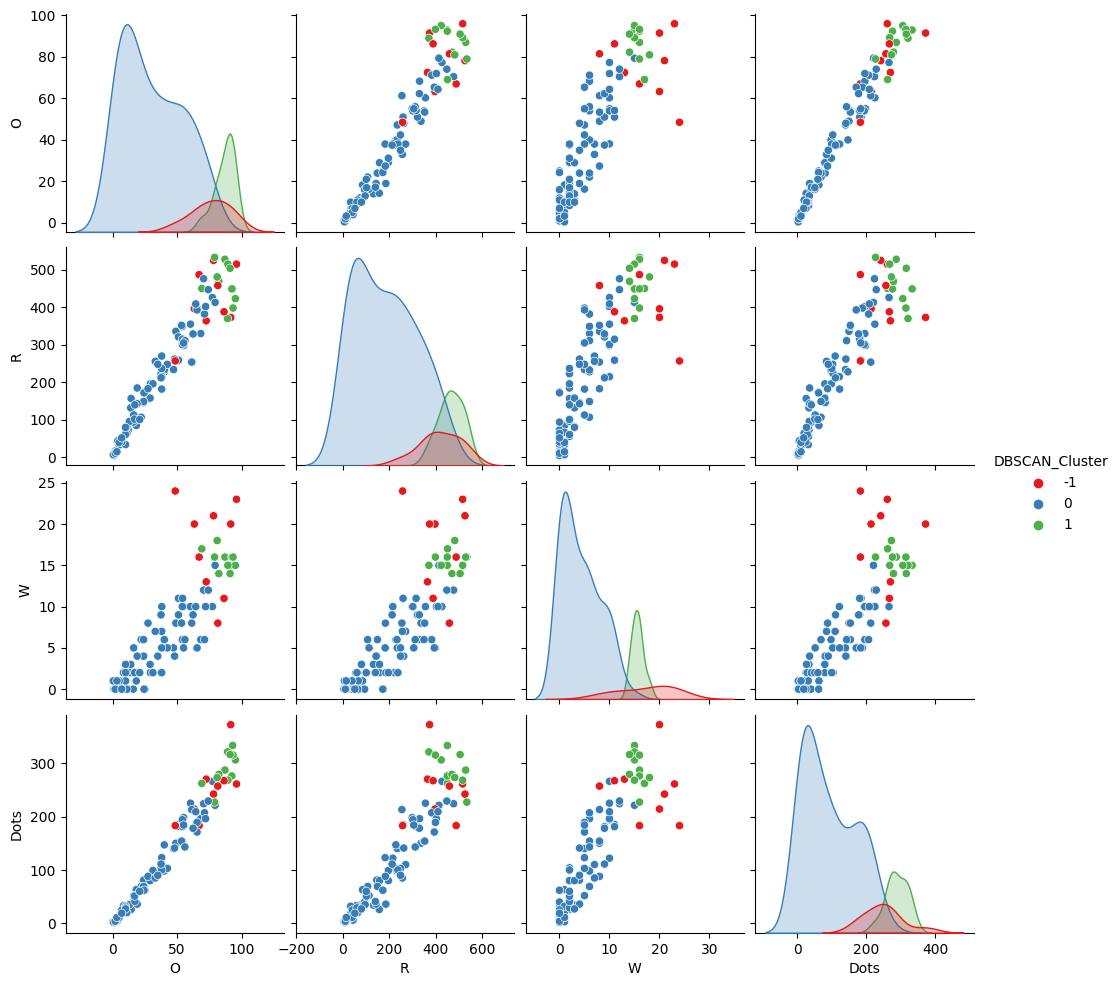

In [153]:
epsilon = 0.6

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
train_labels = dbscan.fit_predict(X_train_scaled)


n_clusters = len(set(train_labels)) - (1 if -1 in train_labels else 0)
n_noise = list(train_labels).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

df_db2['DBSCAN_Cluster'] = dbscan.labels_

if len(set(dbscan.labels_)) > 1:
    silhouette_avg = silhouette_score(X_train_scaled, dbscan.labels_)
    print(f'Silhouette Score: {silhouette_avg:.2f}')
else:
    print("DBSCAN did not find more than one cluster.")

df_db2_subset = df_db2.iloc[:, [1, 2, 3, 6]].copy()
df_db2_subset['DBSCAN_Cluster'] = df_db2['DBSCAN_Cluster']

sns.pairplot(df_db2_subset, hue='DBSCAN_Cluster', palette='Set1')
plt.show()